In [1239]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns
from sklearn import datasets

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

import googlemaps
from datetime import datetime

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

## Querying from that database into Python

#### 1. Connect Python to mta database

In [1240]:
engine = create_engine("sqlite:///mta_data/mta_data.db")
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [1243]:
data = pd.read_sql('PRAGMA table_info(mta_data)', engine);
if "C/A" in data.name:
    # update column name from C/A to CA
    conn =  engine.connect()
    conn.execute('ALTER TABLE mta_data RENAME COLUMN "C/A" TO "CA"')
else:
    print("column C/A updated already")

column C/A updated


#### 2. Explore the Database
   - Querying from that database into Python via SQLAlchemy is required

In [11]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by DATE ASC limit 10;', engine)
mta_data

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,20:00:00,REGULAR,7561578,2583031
6,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748
7,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,6698362,1523749
8,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,6698370,1523761
9,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,6698405,1523790


In [10]:
# check if the data is collected within 
mta_data = pd.read_sql('SELECt COUNT(DISTINCT DATE) FROM mta_data order by DATE ASC;', engine)
mta_data

,COUNT(DISTINCT DATE)
0,140


In [1335]:
# check how many stations
mta_data = pd.read_sql("SELECt  count( DISTINCT STATION) FROM mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021' ;", engine)
mta_data

,count( DISTINCT STATION)
0,379


In [1337]:
# check how many tunstiles
mta_data = pd.read_sql("SELECt  count(*) FROM mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021' group by CA,UNIT,SCP, STATION ;", engine)
mta_data

,count(*)
0,736
1,736
2,738
3,737
4,737
...,...
5025,746
5026,746
5027,746
5028,717


In [1338]:
# check how many entries
mta_data = pd.read_sql("SELECt  count(*) FROM mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021'  ;", engine)
mta_data

,count(*)
0,3679429


In [13]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by ENTRIES desc;', engine)
mta_data.head(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,01:00:00,REGULAR,2147429816,671147622
1,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,05:00:00,REGULAR,2147429813,671147623
2,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,09:00:00,REGULAR,2147429789,671147631
3,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,13:00:00,REGULAR,2147429724,671147646
4,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,17:00:00,REGULAR,2147429654,671147677
5,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,21:00:00,REGULAR,2147429588,671147700
6,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,01:00:00,REGULAR,2147429567,671147707
7,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,05:00:00,REGULAR,2147429563,671147714
8,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,09:00:00,REGULAR,2147429544,671147731
9,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,13:00:00,REGULAR,2147429516,671147757


In [30]:
mta_data.tail(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4187229,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,08:00:00,REGULAR,0,14
4187230,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,12:00:00,REGULAR,0,14
4187231,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,16:00:00,REGULAR,0,14
4187232,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,20:00:00,REGULAR,0,14
4187233,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,00:00:00,REGULAR,0,14
4187234,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,04:00:00,REGULAR,0,14
4187235,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,08:00:00,REGULAR,0,14
4187236,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,12:00:00,REGULAR,0,14
4187237,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,16:00:00,REGULAR,0,14
4187238,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,20:00:00,REGULAR,0,14


In [31]:
mta_data = pd.read_sql('select * from mta_data where ENTRIES==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,0,910
1,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,0,910
2,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,0,910
3,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,0,910
4,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,0,910
5,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,0,910
6,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,0,910
7,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,0,910
8,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,0,910
9,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,0,910


- The entries shows 0 and exits shows 910 - abnormal.. but the goal of the analysis is to find the stations/turnstiles with the most crowd in entrance. we ignore the abnormal issue here 


In [32]:
mta_data = pd.read_sql('select * from mta_data where EXITS==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,524476,0
1,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,524476,0
2,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,524476,0
3,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,524476,0
4,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,524476,0
5,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,524476,0
6,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,524476,0
7,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,524477,0
8,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,524477,0
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,524477,0


In [33]:
mta_data = pd.read_sql('select count(*) from mta_data where EXITS==0 and ENTRIES> 1000; ', engine)
mta_data.head(10)

,count(*)
0,119197


#### Issue observed
- The exits shows 0 but entries shows larger than 1,000 - abnormal.. maybe the station shut down for unknow issue?
- there are 119197 records with this problem. not sure about the reason, 
- for the further analysis, we may look into the analysis result from (1) with these abnormal data (2) without these abnormal data to check the differences


In [34]:
# check the turnstiles with top (max) 5 records in each day

mta_data = pd.read_sql('SELECT *, COUNT(*) FROM mta_data GROUP BY CA, UNIT, SCP, DATE HAVING COUNT(*) IN \
(SELECT MAX(c) FROM (SELECT distinct COUNT(ENTRIES) AS c FROM mta_data GROUP BY  CA, UNIT, SCP, DATE order by c desc));', engine)
mta_data.head()



,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COUNT(*)
0,N110,R283,00-00-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,19045,25148,55
1,N110,R283,00-00-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,5308,8176,55
2,N110,R283,00-00-02,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1176925,2248870,55
3,N110,R283,00-03-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,502859,1771856,55
4,N110,R283,00-03-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1057467,810958,55


In [1279]:
# check total number of turnstiles each date
mta_data = pd.read_sql("SELECT *, count(*) FROM mta_data group by CA, UNIT, SCP, DATE order by DATE asc;", engine)
mta_data.head(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,count(*)
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,6
1,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748,6
2,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1426009,5385019,6
3,A002,R051,02-03-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1580988,2464894,6
4,A002,R051,02-03-02,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,13350,17213,6
5,A002,R051,02-03-03,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6141463,6991882,6
6,A002,R051,02-03-04,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7560411,3903296,6
7,A002,R051,02-03-05,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,12140284,1463972,6
8,A002,R051,02-03-06,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,9465498,514843,6
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,524429,0,6


In [1281]:
mta_dataset=pd.read_sql("select * from mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021';", engine)
mta_dataset.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,20:00:00,REGULAR,7626348,2609238
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,00:00:00,REGULAR,7626446,2609254
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,04:00:00,REGULAR,7626452,2609259
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,08:00:00,REGULAR,7626464,2609272
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,12:00:00,REGULAR,7626508,2609309


In [1283]:
mta_dataset.ENTRIES.count()

3679429

In [1284]:
mta_dataset.DATE.nunique()

123

In [1285]:
mta_dataset.DATE.sort_values().head(5)

3616662    05/01/2021
3564201    05/01/2021
3564202    05/01/2021
3564203    05/01/2021
3564204    05/01/2021
Name: DATE, dtype: object

In [517]:
mta_dataset.DATE.sort_values().tail(5)

55275     08/31/2021
29686     08/31/2021
29687     08/31/2021
111183    08/31/2021
120377    08/31/2021
Name: DATE, dtype: object

In [1247]:
mta_dataset.DATE.nunique()

123

In [1286]:
# copy the retrived mta for pandas analysis
mta_dfs = mta_dataset

## Exploratory data analysis in pandas 

In [1287]:
# explore the data
mta_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679429 entries, 0 to 3679428
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 308.8+ MB


In [1288]:
# check column format
mta_dfs.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [1289]:
mta_dfs.STATION.value_counts(ascending = False)

34 ST-PENN STA     75034
FULTON ST          70783
GRD CNTRL-42 ST    65525
23 ST              53858
86 ST              48106
                   ...  
NEREID AV           2204
PRESIDENT ST        2199
182-183 STS         2197
SUTTER AV           1476
CLEVELAND ST        1474
Name: STATION, Length: 379, dtype: int64

In [1290]:
mta_dfs.dtypes

CA          object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [1291]:
#detect empty value
mta_dfs.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [1292]:
import datetime

In [1293]:
# Take the date and time fields into a single datetime column
mta_dfs["DATETIME"] = pd.to_datetime(mta_dfs.DATE+" "+ mta_dfs.TIME, format="%m/%d/%Y %H:%M:%S")

mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113,2021-08-28 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117,2021-08-28 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135,2021-08-28 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191,2021-08-28 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221,2021-08-28 16:00:00


In [1294]:
mta_dfs.dtypes

CA                  object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int64
EXITS                int64
DATETIME    datetime64[ns]
dtype: object

In [1319]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_dfs
.groupby(["CA", "UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-01 00:00:00,1
2452974,R138,R293,00-03-04,34 ST-PENN STA,2021-07-21 10:00:00,1
2452892,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 18:00:00,1
2452893,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 22:00:00,1
2452894,R138,R293,00-03-04,34 ST-PENN STA,2021-07-08 02:00:00,1


In [1258]:
#check on record with duplicate entries in the same datetime

mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 22).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355449,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,REGULAR,3,0,2021-07-22 00:00:00
1355450,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
1355451,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,REGULAR,3,0,2021-07-22 04:00:00
1355452,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
1355453,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:39:19,REGULAR,3,0,2021-07-22 07:39:19
1355454,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:40:57,REGULAR,3,0,2021-07-22 07:40:57
1355455,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,REGULAR,3,0,2021-07-22 08:00:00
1355456,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00
1355457,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,REGULAR,3,0,2021-07-22 12:00:00
1355458,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00


In [1296]:
mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 21).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355444,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,04:00:00,REGULAR,2,0,2021-07-21 04:00:00
1355445,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,08:00:00,REGULAR,2,0,2021-07-21 08:00:00
1355446,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,12:00:00,REGULAR,2,0,2021-07-21 12:00:00
1355447,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,16:00:00,REGULAR,3,0,2021-07-21 16:00:00
1355448,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,20:00:00,REGULAR,3,0,2021-07-21 20:00:00


- From the data in pre_date (07/21), RECOVR AUD seem not correct. Should keep the Regular One for following analysis.

In [1309]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_dfs
.groupby(["CA", "UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
313628,B024,R211,00-05-00,KINGS HWY,2021-05-02 16:00:00,2
3308705,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 00:00:00,2
313621,B024,R211,00-05-00,KINGS HWY,2021-05-01 12:00:00,2
313620,B024,R211,00-05-00,KINGS HWY,2021-05-01 08:00:00,2
313652,B024,R211,00-05-00,KINGS HWY,2021-05-06 16:00:00,2


In [1339]:
# count how many duplicates in combination  that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" 
mta_dfs[((mta_dfs
.groupby(["CA", "UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False))[['ENTRIES']]==2)].count()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
DATETIME    0
dtype: int64

In [1315]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15970
Name: DESC, dtype: int64

In [1320]:
mta_dfs.STATION.value_counts()

34 ST-PENN STA     75034
FULTON ST          70783
GRD CNTRL-42 ST    65525
23 ST              53858
86 ST              48106
                   ...  
NEREID AV           2204
PRESIDENT ST        2199
182-183 STS         2197
SUTTER AV           1476
CLEVELAND ST        1474
Name: STATION, Length: 379, dtype: int64

In [1326]:
mta_dfs.groupby(['CA','UNIT','SCP', 'STATION'])['SCP'].count()

CA     UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            736
             02-00-01  59 ST            736
             02-03-00  59 ST            738
             02-03-01  59 ST            737
             02-03-02  59 ST            737
                                       ... 
TRAM2  R469  00-00-01  RIT-ROOSEVELT    746
             00-03-00  RIT-ROOSEVELT    746
             00-03-01  RIT-ROOSEVELT    746
             00-05-00  RIT-ROOSEVELT    717
             00-05-01  RIT-ROOSEVELT    740
Name: SCP, Length: 5030, dtype: int64

In [1316]:
# sort the turnstiles data in descending order 
mta_dfs.sort_values(["CA", "UNIT","SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
#drop the the duplicates 
mta_dfs.drop_duplicates(subset=["CA","UNIT","SCP", "STATION", "DATETIME"], inplace=True)

In [1317]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15889
Name: DESC, dtype: int64

In [1340]:
# verify if value for subset ["CA","UNIT","SCP", "STATION", "DATETIME"] is unique
(mta_dfs
.groupby( ["CA","UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending = False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-01 00:00:00,1
2452974,R138,R293,00-03-04,34 ST-PENN STA,2021-07-21 10:00:00,1
2452892,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 18:00:00,1
2452893,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 22:00:00,1
2452894,R138,R293,00-03-04,34 ST-PENN STA,2021-07-08 02:00:00,1


- No more duplicate Entries

In [1341]:
mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,REGULAR,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616,2021-08-31 05:00:00


In [1342]:
## EDA Data backup #backup the half - cleaned data - the duplicates removed & add Datetime
mta_dfs_toProcess = mta_dfs

In [1343]:
mta_dfs = mta_dfs.drop(["DESC"], axis=1, errors="ignore")


In [1344]:
mta_dfs

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,5554,616,2021-08-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2584498,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2584460,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2584394,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2584372,2021-05-01 04:00:00


- each row represents a turnstile (identified by a combination of the C/A, UNIT, SCP, and STATION columns) at a specific time -- approximately four hours apart. The ENTRIES column represents cumulative entries at that point in time.

In [1345]:
mta_dfs[(mta_dfs["CA"]=="A002")&
        (mta_dfs["UNIT"] =="R051") & 
        (mta_dfs["SCP"] =="02-00-00") &
        (mta_dfs["STATION"]=="59 ST") &
         (mta_dfs["DATE"] == "05/01/2021")]


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3470259,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,20:00:00,7564974,2584525,2021-05-01 20:00:00
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2584498,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2584460,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2584394,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2584372,2021-05-01 04:00:00
3470254,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,00:00:00,7564613,2584371,2021-05-01 00:00:00


In [1346]:
mta_dfs[ (mta_dfs['STATION'].str.find('86 ST')!= -1) ]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
96111,R250,R179,00-00-0B,86 ST,456,IRT,08/31/2021,20:00:00,644406,857415,2021-08-31 20:00:00
96110,R250,R179,00-00-0B,86 ST,456,IRT,08/31/2021,16:00:00,643834,857097,2021-08-31 16:00:00
96109,R250,R179,00-00-0B,86 ST,456,IRT,08/31/2021,12:00:00,643406,856710,2021-08-31 12:00:00
96108,R250,R179,00-00-0B,86 ST,456,IRT,08/31/2021,08:00:00,643078,856194,2021-08-31 08:00:00
96107,R250,R179,00-00-0B,86 ST,456,IRT,08/31/2021,04:00:00,643008,855810,2021-08-31 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
3494715,C025,R215,00-00-00,86 ST,R,BMT,05/01/2021,16:00:00,386785,532979,2021-05-01 16:00:00
3494714,C025,R215,00-00-00,86 ST,R,BMT,05/01/2021,12:00:00,386693,532771,2021-05-01 12:00:00
3494713,C025,R215,00-00-00,86 ST,R,BMT,05/01/2021,08:00:00,386582,532658,2021-05-01 08:00:00
3494712,C025,R215,00-00-00,86 ST,R,BMT,05/01/2021,04:00:00,386509,532590,2021-05-01 04:00:00


- The entries is cummulative value. The total entries of the day occur at the last record of the day. Since the mta_dfs is sorted in descending order per group ["CA","UNIT","SCP", "STATION", "DATE"]. We read the last recod of the day (located at the top of the group) using the .first() DataFrame method.

In [1347]:
mta_dfs_daily = (mta_dfs
                      .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                      .agg({'ENTRIES':['max'], 'EXITS':['max'], 'LINENAME':['first'], 'DIVISION':['first'], 'DATETIME':['max']}))
mta_dfs_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
,,,,,,max,max,first,first,max
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00


In [1348]:
mta_dfs_daily[ (mta_dfs_daily['STATION'].str.find('86 ST')!= -1) ]

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
,,,,,,max,max,first,first,max
71856,C025,R215,00-00-00,86 ST,05/01/2021,386875,533207,R,BMT,2021-05-01 20:00:00
71857,C025,R215,00-00-00,86 ST,05/02/2021,387133,533878,R,BMT,2021-05-02 20:00:00
71858,C025,R215,00-00-00,86 ST,05/03/2021,387810,535017,R,BMT,2021-05-03 20:00:00
71859,C025,R215,00-00-00,86 ST,05/04/2021,388561,536260,R,BMT,2021-05-04 20:00:00
71860,C025,R215,00-00-00,86 ST,05/05/2021,389272,537504,R,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...,...
493975,R250,R179,00-00-0B,86 ST,08/27/2021,639779,851571,456,IRT,2021-08-27 20:00:00
493976,R250,R179,00-00-0B,86 ST,08/28/2021,640729,852866,456,IRT,2021-08-28 20:00:00
493977,R250,R179,00-00-0B,86 ST,08/29/2021,641482,853991,456,IRT,2021-08-29 20:00:00


In [1349]:
mta_dfs_daily.dtypes

CA                         object
UNIT                       object
SCP                        object
STATION                    object
DATE                       object
ENTRIES   max               int64
EXITS     max               int64
LINENAME  first            object
DIVISION  first            object
DATETIME  max      datetime64[ns]
dtype: object

In [1350]:
mta_dfs_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614215 entries, 0 to 614214
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   (CA, )             614215 non-null  object        
 1   (UNIT, )           614215 non-null  object        
 2   (SCP, )            614215 non-null  object        
 3   (STATION, )        614215 non-null  object        
 4   (DATE, )           614215 non-null  object        
 5   (ENTRIES, max)     614215 non-null  int64         
 6   (EXITS, max)       614215 non-null  int64         
 7   (LINENAME, first)  614215 non-null  object        
 8   (DIVISION, first)  614215 non-null  object        
 9   (DATETIME, max)    614215 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 51.5+ MB


In [1351]:
mta_dfs_daily.columns = [column[0] for column in mta_dfs_daily.columns]

In [1352]:
mta_dfs_daily.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS', 'LINENAME',
       'DIVISION', 'DATETIME'],
      dtype='object')

In [1353]:
mta_dfs_daily_entries = mta_dfs_daily.copy()

In [1354]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00


### Problem 3b
- Use the daily maximum `ENTRIES`+`EXITS` calculations to find the turnstiles with high traffic/crowd flow. 
- `ENTRIES` and `EXITS` are **cumulative** on each day

In [1355]:
mta_dfs_daily_entries[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_dfs_daily_entries
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES","EXITS"]]
                                                       .shift(1))

In [1356]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0,614.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0,614.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0,615.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0,616.0


In [1357]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['PREV_DATE'].isna())].head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
123,A002,R051,02-00-01,59 ST,05/01/2021,6701149,1524757,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
246,A002,R051,02-03-00,59 ST,05/01/2021,1427337,5390302,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
369,A002,R051,02-03-01,59 ST,05/01/2021,1584850,2470649,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
492,A002,R051,02-03-02,59 ST,05/01/2021,16430,21397,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
615,A002,R051,02-03-03,59 ST,05/01/2021,6143868,6995176,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
738,A002,R051,02-03-04,59 ST,05/01/2021,7563309,3905271,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
861,A002,R051,02-03-05,59 ST,05/01/2021,12145355,1464647,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
984,A002,R051,02-03-06,59 ST,05/01/2021,9468421,515052,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
1107,A002,R051,02-05-00,59 ST,05/01/2021,524430,0,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN


In [1358]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['CA']=="A002") \
                      & (mta_dfs_daily_entries['UNIT']=="R051")]\
                    .sort_values('DATE')\
                    .value_counts().head(10)

CA    UNIT  SCP       STATION  DATE        ENTRIES   EXITS    LINENAME  DIVISION  DATETIME             PREV_DATE   PREV_ENTRIES  PREV_EXITS
A002  R051  02-00-00  59 ST    05/02/2021  7565300   2584647  NQR456W   BMT       2021-05-02 20:00:00  05/01/2021  7564974.0     2584525.0     1
            02-03-06  59 ST    05/09/2021  9471786   515216   NQR456W   BMT       2021-05-09 20:00:00  05/08/2021  9471588.0     515202.0      1
                               05/07/2021  9471316   515184   NQR456W   BMT       2021-05-07 20:00:00  05/06/2021  9470719.0     515154.0      1
                               05/06/2021  9470719   515154   NQR456W   BMT       2021-05-06 20:00:00  05/05/2021  9470194.0     515122.0      1
                               05/05/2021  9470194   515122   NQR456W   BMT       2021-05-05 20:00:00  05/04/2021  9469656.0     515098.0      1
                               05/04/2021  9469656   515098   NQR456W   BMT       2021-05-04 20:00:00  05/03/2021  9469090.0     515084

In [1359]:
mta_dfs_daily_entries.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS', 'LINENAME',
       'DIVISION', 'DATETIME', 'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS'],
      dtype='object')

In [1360]:
# Drop the rows for the earliest date in the mta_dfs_daily_entries
mta_dfs_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [1361]:
mta_dfs_daily_entries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609185 entries, 1 to 614214
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CA            609185 non-null  object        
 1   UNIT          609185 non-null  object        
 2   SCP           609185 non-null  object        
 3   STATION       609185 non-null  object        
 4   DATE          609185 non-null  object        
 5   ENTRIES       609185 non-null  int64         
 6   EXITS         609185 non-null  int64         
 7   LINENAME      609185 non-null  object        
 8   DIVISION      609185 non-null  object        
 9   DATETIME      609185 non-null  datetime64[ns]
 10  PREV_DATE     609185 non-null  object        
 11  PREV_ENTRIES  609185 non-null  float64       
 12  PREV_EXITS    609185 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 65.1+ MB


In [1362]:
(mta_dfs_daily_entries['ENTRIES'] -mta_dfs_daily_entries['PREV_ENTRIES']).describe()

count    6.091850e+05
mean    -5.517337e+03
std      3.335444e+06
min     -1.383110e+09
25%      7.900000e+01
50%      2.580000e+02
75%      5.130000e+02
max      1.179009e+09
dtype: float64

In [1363]:
(mta_dfs_daily_entries['EXITS'] -mta_dfs_daily_entries['PREV_EXITS']).describe()

count    6.091850e+05
mean    -5.745763e+03
std      6.318952e+06
min     -2.133741e+09
25%      7.600000e+01
50%      2.510000e+02
75%      5.640000e+02
max      2.133741e+09
dtype: float64

#### Issues observed:
-  (1) negative values of daily differences in both ENTRIES and EXITS
-  (2) Some values are *way* too big ( by the difference between the `max` and the `75%` percentile). 


In [1364]:
# How many rows are backwards 
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].shape

(5721, 13)

In [1366]:
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].shape

(5721, 13)

In [1367]:
# check the data
mta_dfs_daily_entries[mta_dfs_daily_entries["EXITS"] < mta_dfs_daily_entries["PREV_EXITS"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,489603887,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0,489604774.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,489603188,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0,489603887.0
4800,A011,R080,01-03-00,57 ST-7 AV,05/04/2021,885607682,489602188,NQRW,BMT,2021-05-04 20:00:00,05/03/2021,885607915.0,489603188.0
4801,A011,R080,01-03-00,57 ST-7 AV,05/05/2021,885607416,489601102,NQRW,BMT,2021-05-05 20:00:00,05/04/2021,885607682.0,489602188.0
4802,A011,R080,01-03-00,57 ST-7 AV,05/06/2021,885607137,489599967,NQRW,BMT,2021-05-06 20:00:00,05/05/2021,885607416.0,489601102.0


In [1371]:
# check the detail entries with the reverse counting 
mask = ((mta_dfs["CA"] == "A011") & 
(mta_dfs["UNIT"] == "R080") & 
(mta_dfs["SCP"] == "01-03-00") & 
(mta_dfs["STATION"] == "57 ST-7 AV") &
(mta_dfs["DATETIME"].dt.date >= datetime.datetime(2021, 5, 2).date()) &
        (mta_dfs["DATETIME"].dt.date <= datetime.datetime(2021, 5, 3).date()))
mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3471907,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,20:00:00,885607730,489602256,2021-05-03 20:00:00
3471906,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,16:00:00,885607830,489602429,2021-05-03 16:00:00
3471905,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,12:00:00,885607880,489602629,2021-05-03 12:00:00
3471904,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,08:00:00,885607898,489602994,2021-05-03 08:00:00
3471903,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,04:00:00,885607909,489603183,2021-05-03 04:00:00
3471902,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,00:00:00,885607915,489603188,2021-05-03 00:00:00
3471901,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,20:00:00,885607944,489603265,2021-05-02 20:00:00
3471900,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,16:00:00,885607993,489603421,2021-05-02 16:00:00
3471899,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,12:00:00,885608027,489603627,2021-05-02 12:00:00
3471898,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,08:00:00,885608045,489603794,2021-05-02 08:00:00


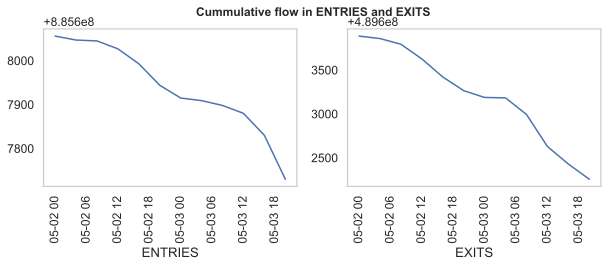

In [1382]:
label=['2021-05-03 20:00:00','2021-05-03 16:00:00', '2021-05-03 12:00:00', '2021-05-03 08:00:00','2021-05-03 04:00:00', 
      '2021-05-02 20:00:00','2021-05-02 16:00:00', '2021-05-02 12:00:00', '2021-05-02 08:00:00','2021-05-02 04:00:00']

fig = plt.figure(figsize=(10, 3))
fig.suptitle('Cummulative flow in ENTRIES and EXITS', fontsize=12, weight='bold')
# Adds subplot on position 1
ax1 = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax1.plot(mta_dfs[mask].DATETIME.tolist(), mta_dfs[mask].ENTRIES.tolist())
ax2.plot( mta_dfs[mask].DATETIME.tolist(), mta_dfs[mask].EXITS.tolist())
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax1.set_xlabel("ENTRIES")
ax2.set_xlabel("EXITS")
ax1.grid(None)
ax2.grid(None)

plt.subplots_adjust(bottom=0.15)

#plt.show();
plt.savefig('./pics/mtadata_issue.png')


-  the counter is working reversely

#### check how many entries has this issue

In [1380]:
# Let's see how many stations have this problem

(mta_dfs_daily_entries[mta_dfs_daily_entries['ENTRIES'] <mta_dfs_daily_entries['PREV_ENTRIES']]
.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
.count())

DATE  ENTRIES  EXITS  LINENAME  DIVISION  \
CA    UNIT SCP      STATION                                                     
A011  R080 01-03-00 57 ST-7 AV        122      122    122       122       122   
           01-03-04 57 ST-7 AV          1        1      1         1         1   
A013  R081 01-06-01 49 ST               2        2      2         2         2   
A014  R081 02-00-00 49 ST               1        1      1         1         1   
A015  R081 00-00-02 49 ST               1        1      1         1         1   
...                                   ...      ...    ...       ...       ...   
R633  R068 00-00-01 VAN SICLEN AV       1        1      1         1         1   
R646  R110 01-00-02 FLATBUSH AV-B.C     1        1      1         1         1   
R730  R431 00-00-04 EASTCHSTER/DYRE   120      120    120       120       120   
S101  R070 00-00-02 ST. GEORGE          1        1      1         1         1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT       1        1      1         1         1   

                                     DATETIME  PREV_DATE  PREV_ENTRIES  \
CA    UNIT SCP      STATION                                              
A011  R080 01-03-00 57 ST-7 AV            122        122           122   
           01-03-04 57 ST-7 AV              1          1             1   
A013  R081 01-06-01 49 ST                   2          2             2   
A014  R081 02-00-00 49 ST                   1          1             1   
A015  R081 00-00-02 49 ST                   1          1             1   
...                                       ...        ...           ...   
R633  R068 00-00-01 VAN SICLEN AV           1          1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C         1          1             1   
R730  R431 00-00-04 EASTCHSTER/DYRE       120        120           120   
S101  R070 00-00-02 ST. GEORGE              1          1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT           1          1             1   

                                     PREV_EXITS  
CA    UNIT SCP      STATION                      
A011  R080 01-03-00 57 ST-7 AV              122  
           01-03-04 57 ST-7 AV                1  
A013  R081 01-06-01 49 ST                     2  
A014  R081 02-00-00 49 ST                     1  
A015  R081 00-00-02 49 ST                     1  
...                                         ...  
R633  R068 00-00-01 VAN SICLEN AV             1  
R646  R110 01-00-02 FLATBUSH AV-B.C           1  
R730  R431 00-00-04 EASTCHSTER/DYRE         120  
S101  R070 00-00-02 ST. GEORGE                1  
TRAM2 R469 00-05-00 RIT-ROOSEVELT             1  

[251 rows x 9 columns]

#### solve issue2
 - use apply function to reverse the reverse counting entries
 - (1) flip the sign for the daily diff entries
 - (2) If the diff is bigger than (max_counter) then take the smaller one if the smaller value is less than max_counter, otherwise, reset to 0
 - max_counter: There are total 379 distinct stations in the data set with 5030 turnstiles. 
 - In 2020, the subway has daily ridership of approximately 2 million. Also, Times Square-42nd Street station (with 37 SCPs) is the busiest station in 2020 and its average daily ridership in 2019 was a staggering 178,138. In this analysis, the data entries here is counted every 4 hours in each turnstile; therefore. 

 https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2020
 https://www.timessquarenyc.org/do-business/market-research-data/transit-ridership
 
 
 

In [1383]:
mta_dfs[(mta_dfs['STATION'].str.find('TIMES')!= -1)].SCP.nunique()

37

In [1384]:
def get_daily_counts(row, max_counter):
    counter = row.ENTRIES - row.PREV_ENTRIES
    if counter < 0: # reverse counting
        counter = -counter
    if counter > max_counter:
        # try to take the min first
        print(f'entries: {row.ENTRIES} <-- {row.PREV_ENTRIES}')
        counter = min(row.ENTRIES, row.PREV_ENTRIES)
        
    if counter > max_counter: 
        # if still too big , reset to 0 
        print(f'entries: 0 <-- {counter}')
        return 0 
    
    return counter

In [1385]:
def get_daily_exits_counts(row, max_counter):
    counter = row.EXITS - row.PREV_EXITS
    if counter < 0: # reverse counting
        counter = -counter
    if counter > max_counter:
        # try to take the min first
        print(f'entries: {row.EXITS} <-- {row.PREV_EXITS}')
        counter = min(row.EXITS, row.PREV_EXITS)
        
    if counter > max_counter: 
        # if still too big , reset to 0 
        print(f'entries: 0 <-- {counter}')
        return 0 
    
    return counter

In [1386]:
# test1: max_counter=100000  maxium number of entry into turnstile in a day 
mta_dfs_daily_entries['DAILY_ENTRIES_TEST1'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=100000)

entries: 3109 <-- 1390173.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 182 <-- 765804.0
entries: 327866 <-- 756269765.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 101 <-- 2651127.0
entries: 167790157 <-- 702266.0
entries: 0 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 901 <-- 659349.0
entries: 164 <-- 2627869.0
entries: 460 <-- 1605140.0
entries: 6588 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 8986986 <-- 29083.0
entries: 29438 <-- 8986986.0
entries: 11310395 <-- 1893566.0
entries: 0 <-- 1893566.0
entries: 1894639 <-- 11310395.0
entries: 0 <-- 1894639
entries: 778 <-- 8883051.0
entries: 328315 <-- 7577112.0
entries: 240 <-- 4780276.0
entries: 67109632 <-- 14.0
entries: 327682 <-- 67109640.0
entries: 15 <-- 67109632.0
entries: 276 <-- 755149.0
entries: 12517611 <-- 82.0
entries: 66 <-- 1198448.0
entries: 916 <-- 5405537.0
entries: 687970551 <-- 19471253.0
entries: 0 <-- 19471253.0
entries: 200 <-- 705357551.0
entries: 1076 <-- 7489966.0
ent

In [154]:
mta_dfs_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES_TEST1
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,586.0


In [155]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST1.describe()


count    609185.000000
mean        400.055239
std        3438.074646
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max      499768.000000
Name: DAILY_ENTRIES_TEST1, dtype: float64

 - diff between max and 75% still very big, take a smaller max_counter
 - try a 50000 as maxium numer in for 4 hours of a day per turnstile(assume every seconds has 2-4 people enter or exit the turnstiles)

In [1475]:
# # test2: max_counter=50000, maxium number of entry into turnstile in a day within 4 hours

mta_dfs_daily_entries['DAILY_ENTRIES_TEST2'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=50000)

entries: 3109 <-- 1390173.0
entries: 160 <-- 479907.0
entries: 947 <-- 67653.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 182 <-- 765804.0
entries: 235 <-- 150038.0
entries: 327866 <-- 756269765.0
entries: 0 <-- 327866
entries: 1132 <-- 328024.0
entries: 27 <-- 262152.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 458752 <-- 24.0
entries: 101 <-- 2651127.0
entries: 393219 <-- 459438.0
entries: 0 <-- 393219
entries: 458754 <-- 262214.0
entries: 0 <-- 262214.0
entries: 8 <-- 458758.0
entries: 167790157 <-- 702266.0
entries: 0 <-- 702266.0
entries: 1191 <-- 59592.0
entries: 48 <-- 8724126.0
entries: 65 <-- 106396.0
entries: 458754 <-- 262144.0
entries: 0 <-- 262144.0
entries: 393216 <-- 458752.0
entries: 0 <-- 393216
entries: 42 <-- 72848.0
entries: 901 <-- 659349.0
entries: 1021 <-- 92161.0
entries: 1064 <-- 150473.0
entries: 393216 <-- 728.0
entries: 327680 <-- 4.0
entries: 1 <-- 327690.0
entries: 164 <-- 2627869.0
entries: 327680 <-- 262144.0
entries:

In [1476]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST2.describe()


count    609185.000000
mean        361.051193
std         491.510866
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max       49170.000000
Name: DAILY_ENTRIES_TEST2, dtype: float64

In [1477]:
mta_dfs_daily_entries.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES,DAILY_ENTRIES_TEST2
count,6.091850e+05,6.091850e+05,6.091850e+05,6.091850e+05,609185.000000,609185.000000,609185.000000,609185.000000
mean,4.157559e+07,3.327161e+07,4.158110e+07,3.327736e+07,409.165429,2.983289,358.563860,361.051193
std,2.181575e+08,1.919791e+08,2.181687e+08,1.920043e+08,488.324496,2.020460,381.649467,491.510866
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.146370e+05,9.621100e+04,2.146020e+05,9.609700e+04,79.000000,1.000000,85.000000,85.000000
50%,1.397484e+06,8.458840e+05,1.397851e+06,8.460400e+05,254.000000,3.000000,263.000000,263.000000
75%,5.996050e+06,3.956563e+06,5.996756e+06,3.956642e+06,569.000000,5.000000,520.000000,520.000000
max,2.147427e+09,2.133797e+09,2.147427e+09,2.133797e+09,19509.000000,6.000000,24866.000000,49170.000000


In [1478]:
# Keep Test2 DAILY_ENTRIES_TEST2
mta_dfs_daily_entries = mta_dfs_daily_entries.drop(["DAILY_ENTRIES_TEST1","DAILY_ENTRIES"], axis=1, errors="ignore")
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES_TEST2
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,122.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,246.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,262.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,277.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,226.0,3,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0,614.0,0.0,4,0.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0,614.0,1.0,5,0.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0,615.0,1.0,6,0.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0,616.0,0.0,0,0.0


In [1479]:
#-- From the mean , std vs max, use TEST2 for further analysis
mta_dfs_daily_entries.rename(columns={'DAILY_ENTRIES_TEST2': 'DAILY_ENTRIES'}, inplace=True)

In [1480]:
mta_dfs_daily_entries.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
count,6.091850e+05,6.091850e+05,6.091850e+05,6.091850e+05,609185.000000,609185.000000,609185.000000
mean,4.157559e+07,3.327161e+07,4.158110e+07,3.327736e+07,409.165429,2.983289,361.051193
std,2.181575e+08,1.919791e+08,2.181687e+08,1.920043e+08,488.324496,2.020460,491.510866
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.146370e+05,9.621100e+04,2.146020e+05,9.609700e+04,79.000000,1.000000,85.000000
50%,1.397484e+06,8.458840e+05,1.397851e+06,8.460400e+05,254.000000,3.000000,263.000000
75%,5.996050e+06,3.956563e+06,5.996756e+06,3.956642e+06,569.000000,5.000000,520.000000
max,2.147427e+09,2.133797e+09,2.147427e+09,2.133797e+09,19509.000000,6.000000,49170.000000


In [1481]:
# check the data
mta_dfs_daily_entries[mta_dfs_daily_entries["EXITS"] < mta_dfs_daily_entries["PREV_EXITS"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,489603887,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0,489604774.0,887.0,6,184.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,489603188,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0,489603887.0,699.0,0,141.0
4800,A011,R080,01-03-00,57 ST-7 AV,05/04/2021,885607682,489602188,NQRW,BMT,2021-05-04 20:00:00,05/03/2021,885607915.0,489603188.0,1000.0,1,233.0
4801,A011,R080,01-03-00,57 ST-7 AV,05/05/2021,885607416,489601102,NQRW,BMT,2021-05-05 20:00:00,05/04/2021,885607682.0,489602188.0,1086.0,2,266.0
4802,A011,R080,01-03-00,57 ST-7 AV,05/06/2021,885607137,489599967,NQRW,BMT,2021-05-06 20:00:00,05/05/2021,885607416.0,489601102.0,1135.0,3,279.0


In [1482]:
mask = ((mta_dfs["CA"] == "A011") & 
(mta_dfs["UNIT"] == "R080") & 
(mta_dfs["SCP"] == "01-03-00") & 
(mta_dfs["STATION"] == "57 ST-7 AV") &
(mta_dfs["DATETIME"].dt.date >= datetime.datetime(2021, 5, 2).date()) &
        (mta_dfs["DATETIME"].dt.date <= datetime.datetime(2021, 5, 3).date()))
mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3471907,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,20:00:00,885607730,489602256,2021-05-03 20:00:00
3471906,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,16:00:00,885607830,489602429,2021-05-03 16:00:00
3471905,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,12:00:00,885607880,489602629,2021-05-03 12:00:00
3471904,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,08:00:00,885607898,489602994,2021-05-03 08:00:00
3471903,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,04:00:00,885607909,489603183,2021-05-03 04:00:00
3471902,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,00:00:00,885607915,489603188,2021-05-03 00:00:00
3471901,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,20:00:00,885607944,489603265,2021-05-02 20:00:00
3471900,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,16:00:00,885607993,489603421,2021-05-02 16:00:00
3471899,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,12:00:00,885608027,489603627,2021-05-02 12:00:00
3471898,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,08:00:00,885608045,489603794,2021-05-02 08:00:00


In [1483]:
# Let's see how many stations have this problem

(mta_dfs_daily_entries[mta_dfs_daily_entries['EXITS'] <mta_dfs_daily_entries['PREV_EXITS']]
.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
.count())

DATE  ENTRIES  EXITS  LINENAME  DIVISION  \
CA    UNIT SCP      STATION                                                     
A011  R080 01-03-00 57 ST-7 AV        122      122    122       122       122   
           01-03-04 57 ST-7 AV          1        1      1         1         1   
A013  R081 01-06-01 49 ST               2        2      2         2         2   
A014  R081 02-00-00 49 ST               1        1      1         1         1   
A015  R081 00-00-02 49 ST               1        1      1         1         1   
...                                   ...      ...    ...       ...       ...   
R633  R068 00-00-01 VAN SICLEN AV       1        1      1         1         1   
R646  R110 01-00-02 FLATBUSH AV-B.C     1        1      1         1         1   
R728  R226 00-05-01 GUN HILL RD         1        1      1         1         1   
S101  R070 00-00-02 ST. GEORGE          1        1      1         1         1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT       2        2      2         2         2   

                                     DATETIME  PREV_DATE  PREV_ENTRIES  \
CA    UNIT SCP      STATION                                              
A011  R080 01-03-00 57 ST-7 AV            122        122           122   
           01-03-04 57 ST-7 AV              1          1             1   
A013  R081 01-06-01 49 ST                   2          2             2   
A014  R081 02-00-00 49 ST                   1          1             1   
A015  R081 00-00-02 49 ST                   1          1             1   
...                                       ...        ...           ...   
R633  R068 00-00-01 VAN SICLEN AV           1          1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C         1          1             1   
R728  R226 00-05-01 GUN HILL RD             1          1             1   
S101  R070 00-00-02 ST. GEORGE              1          1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT           2          2             2   

                                     PREV_EXITS  DAILY_EXITS  DAY_OF_WEEKS  \
CA    UNIT SCP      STATION                                                  
A011  R080 01-03-00 57 ST-7 AV              122          122           122   
           01-03-04 57 ST-7 AV                1            1             1   
A013  R081 01-06-01 49 ST                     2            2             2   
A014  R081 02-00-00 49 ST                     1            1             1   
A015  R081 00-00-02 49 ST                     1            1             1   
...                                         ...          ...           ...   
R633  R068 00-00-01 VAN SICLEN AV             1            1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C           1            1             1   
R728  R226 00-05-01 GUN HILL RD               1            1             1   
S101  R070 00-00-02 ST. GEORGE                1            1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT             2            2             2   

                                     DAILY_ENTRIES  
CA    UNIT SCP      STATION                         
A011  R080 01-03-00 57 ST-7 AV                 122  
           01-03-04 57 ST-7 AV                   1  
A013  R081 01-06-01 49 ST                        2  
A014  R081 02-00-00 49 ST                        1  
A015  R081 00-00-02 49 ST                        1  
...                                            ...  
R633  R068 00-00-01 VAN SICLEN AV                1  
R646  R110 01-00-02 FLATBUSH AV-B.C              1  
R728  R226 00-05-01 GUN HILL RD                  1  
S101  R070 00-00-02 ST. GEORGE                   1  
TRAM2 R469 00-05-00 RIT-ROOSEVELT                2  

[235 rows x 12 columns]

In [1484]:
mta_dfs_daily_entries['DAILY_EXITS'] = mta_dfs_daily_entries.apply(get_daily_exits_counts, axis = 1, max_counter=50000)

entries: 540 <-- 995824.0
entries: 115 <-- 154058.0
entries: 69 <-- 808418.0
entries: 15 <-- 538441.0
entries: 561 <-- 1653840.0
entries: 304 <-- 436767843.0
entries: 165 <-- 2357391.0
entries: 0 <-- 3196184.0
entries: 137 <-- 2192493.0
entries: 268473848 <-- 1083083.0
entries: 0 <-- 1083083.0
entries: 65 <-- 8512839.0
entries: 602 <-- 1025567.0
entries: 259 <-- 160229.0
entries: 0 <-- 67865.0
entries: 576 <-- 205674.0
entries: 676 <-- 274285.0
entries: 245 <-- 2944261.0
entries: 1205 <-- 161084.0
entries: 1145 <-- 152516.0
entries: 262 <-- 561847.0
entries: 4013 <-- 494213.0
entries: 11186662 <-- 73496.0
entries: 0 <-- 73496.0
entries: 74398 <-- 11186662.0
entries: 0 <-- 74398
entries: 10489132 <-- 49160.0
entries: 49563 <-- 10489132.0
entries: 3487 <-- 1152627.0
entries: 95 <-- 751600.0
entries: 14484466 <-- 852978.0
entries: 0 <-- 852978.0
entries: 853081 <-- 14484466.0
entries: 0 <-- 853081
entries: 800988285 <-- 4318079.0
entries: 0 <-- 4318079.0
entries: 4318302 <-- 800988285.0
e

In [1485]:
mta_dfs_daily_entries['DAY_OF_WEEKS'] = mta_dfs_daily_entries.DATETIME.dt.weekday

In [1486]:
mta_dfs_daily_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,122.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,246.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,262.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,277.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,226.0,3,586.0


In [1487]:
#get weekend data for analysis

mask = ( (mta_dfs_daily_entries['DAY_OF_WEEKS']==5) | (mta_dfs_daily_entries['DAY_OF_WEEKS']==6))

mta_dfs_weekend_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekend_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,122.0,6,326.0
7,A002,R051,02-00-00,59 ST,05/08/2021,7568516,2585969,NQR456W,BMT,2021-05-08 20:00:00,05/07/2021,7568106.0,2585842.0,127.0,5,410.0
8,A002,R051,02-00-00,59 ST,05/09/2021,7568840,2586097,NQR456W,BMT,2021-05-09 20:00:00,05/08/2021,7568516.0,2585969.0,128.0,6,324.0
14,A002,R051,02-00-00,59 ST,05/15/2021,7572186,2587583,NQR456W,BMT,2021-05-15 20:00:00,05/14/2021,7571785.0,2587459.0,124.0,5,401.0
15,A002,R051,02-00-00,59 ST,05/16/2021,7572532,2587702,NQR456W,BMT,2021-05-16 20:00:00,05/15/2021,7572186.0,2587583.0,119.0,6,346.0


In [1488]:
#get weekday data for analysis

mask = ((mta_dfs_daily_entries['DAY_OF_WEEKS']>=0) & (mta_dfs_daily_entries['DAY_OF_WEEKS'] < 5))

mta_dfs_weekday_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekday_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,246.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,262.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,277.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,226.0,3,586.0
6,A002,R051,02-00-00,59 ST,05/07/2021,7568106,2585842,NQR456W,BMT,2021-05-07 20:00:00,05/06/2021,7567550.0,2585658.0,184.0,4,556.0


### Analysis1: each ControlArea/UNIT/STATION combo, for each day
#### 1 Summary data (Daily)
- For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [1489]:
ca_unit_station_daily = mta_dfs_daily_entries.groupby(['CA','UNIT', 'STATION','DATE'])\
                    [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()

In [1490]:
ca_unit_station_daily.head()

,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,05/02/2021,2590.0,1875.0
1,A002,R051,59 ST,05/03/2021,4379.0,3660.0
2,A002,R051,59 ST,05/04/2021,4890.0,3862.0
3,A002,R051,59 ST,05/05/2021,4847.0,3866.0
4,A002,R051,59 ST,05/06/2021,5068.0,3905.0


In [1491]:
ca_unit_station_daily.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
56070,56070,PTH22,R540,PATH NEW WTC,05/06/2021,125840.0,153965.0
56132,56132,PTH22,R540,PATH NEW WTC,07/07/2021,93425.0,102038.0
56147,56147,PTH22,R540,PATH NEW WTC,07/22/2021,67120.0,22671.0
56118,56118,PTH22,R540,PATH NEW WTC,06/23/2021,65980.0,20071.0
56167,56167,PTH22,R540,PATH NEW WTC,08/11/2021,59705.0,20371.0
56160,56160,PTH22,R540,PATH NEW WTC,08/04/2021,58031.0,59257.0
56151,56151,PTH22,R540,PATH NEW WTC,07/26/2021,56483.0,19372.0
54211,54211,PTH03,R552,JOURNAL SQUARE,08/07/2021,55043.0,50139.0
54212,54212,PTH03,R552,JOURNAL SQUARE,08/08/2021,53387.0,48486.0
29563,29563,N094,R029,WORLD TRADE CTR,06/26/2021,52344.0,6043.0


#### 1.1 Weekday data
- For each ControlArea/UNIT/STATION combo for weekday 

In [1492]:
ca_unit_station_weekday = mta_dfs_weekday_entries.groupby(['CA','UNIT', 'STATION', 'DATE']) [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
ca_unit_station_weekday.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
39982,39982,PTH22,R540,PATH NEW WTC,05/06/2021,125840.0,153965.0
40026,40026,PTH22,R540,PATH NEW WTC,07/07/2021,93425.0,102038.0
40037,40037,PTH22,R540,PATH NEW WTC,07/22/2021,67120.0,22671.0
40016,40016,PTH22,R540,PATH NEW WTC,06/23/2021,65980.0,20071.0
40051,40051,PTH22,R540,PATH NEW WTC,08/11/2021,59705.0,20371.0
40046,40046,PTH22,R540,PATH NEW WTC,08/04/2021,58031.0,59257.0
40039,40039,PTH22,R540,PATH NEW WTC,07/26/2021,56483.0,19372.0
39527,39527,PTH16,R550,LACKAWANNA,08/09/2021,51229.0,22636.0
39436,39436,PTH13,R541,THIRTY ST,08/03/2021,50369.0,7192.0
38693,38693,PTH04,R551,GROVE STREET,05/28/2021,45840.0,39297.0


#### 1.2 Weekend data
- For each ControlArea/UNIT/STATION combo for weekend
- sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [1493]:
ca_unit_station_weekend = mta_dfs_weekend_entries.groupby(['CA','UNIT', 'STATION', 'DATE']) [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
ca_unit_station_weekend.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
15554,15554,PTH03,R552,JOURNAL SQUARE,08/07/2021,55043.0,50139.0
15555,15555,PTH03,R552,JOURNAL SQUARE,08/08/2021,53387.0,48486.0
8481,8481,N094,R029,WORLD TRADE CTR,06/26/2021,52344.0,6043.0
8477,8477,N094,R029,WORLD TRADE CTR,06/12/2021,52176.0,6335.0
8482,8482,N094,R029,WORLD TRADE CTR,06/27/2021,51834.0,5883.0
8478,8478,N094,R029,WORLD TRADE CTR,06/13/2021,51453.0,5706.0
15687,15687,PTH07,R550,CITY / BUS,07/11/2021,50606.0,5005.0
19983,19983,R236,R045,GRD CNTRL-42 ST,06/12/2021,38225.0,2084.0
8491,8491,N094,R029,WORLD TRADE CTR,07/31/2021,37017.0,5647.0
16118,16118,PTH22,R540,PATH NEW WTC,08/21/2021,34897.0,35682.0


### Analysis2: daily entries of all the turnstiles in each station
#### 2 Summary data (Daily)
-  Daily time series for each STATION, by adding up the daily entries for all the turnstiles in each station.some has only one

In [1494]:
station_daily = mta_dfs_daily_entries.groupby(["STATION", "LINENAME","DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS
49241,PATH NEW WTC,1,05/06/2021,125840.0,153965.0
49303,PATH NEW WTC,1,07/07/2021,93425.0,102038.0
49318,PATH NEW WTC,1,07/22/2021,67120.0,22671.0
49289,PATH NEW WTC,1,06/23/2021,65980.0,20071.0
12550,42 ST-PORT AUTH,ACENQRS1237W,08/20/2021,62966.0,36032.0
49338,PATH NEW WTC,1,08/11/2021,59705.0,20371.0
38093,GRD CNTRL-42 ST,4567S,06/12/2021,58340.0,32511.0
49331,PATH NEW WTC,1,08/04/2021,58031.0,59257.0
49322,PATH NEW WTC,1,07/26/2021,56483.0,19372.0
41565,JOURNAL SQUARE,1,08/07/2021,55043.0,50139.0


#### 2.1 Weekday data
- For each STATION combo for weekday 

In [1495]:
station_weekday = mta_dfs_weekday_entries.groupby(["STATION","LINENAME", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_weekday.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS
35109,PATH NEW WTC,1,05/06/2021,125840.0,153965.0
35153,PATH NEW WTC,1,07/07/2021,93425.0,102038.0
35164,PATH NEW WTC,1,07/22/2021,67120.0,22671.0
35143,PATH NEW WTC,1,06/23/2021,65980.0,20071.0
8949,42 ST-PORT AUTH,ACENQRS1237W,08/20/2021,62966.0,36032.0
35178,PATH NEW WTC,1,08/11/2021,59705.0,20371.0
35173,PATH NEW WTC,1,08/04/2021,58031.0,59257.0
35166,PATH NEW WTC,1,07/26/2021,56483.0,19372.0
30769,LACKAWANNA,1,08/09/2021,51229.0,22636.0
8103,34 ST-PENN STA,ACE,05/25/2021,50660.0,76350.0


#### 2.2 Weekend data
- Weekend time series for each STATIO
- adding up the daily entries for all the turnstiles in each station

In [1496]:
station_weekend = mta_dfs_weekend_entries.groupby(["STATION", "DATE", "LINENAME"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_weekend.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,LINENAME,DAILY_ENTRIES,DAILY_EXITS
10931,GRD CNTRL-42 ST,06/12/2021,4567S,58340.0,32511.0
11927,JOURNAL SQUARE,08/07/2021,1,55043.0,50139.0
11928,JOURNAL SQUARE,08/08/2021,1,53387.0,48486.0
16594,WORLD TRADE CTR,06/26/2021,ACE23,52344.0,6043.0
16590,WORLD TRADE CTR,06/12/2021,ACE23,52176.0,6335.0
16595,WORLD TRADE CTR,06/27/2021,ACE23,51834.0,5883.0
16591,WORLD TRADE CTR,06/13/2021,ACE23,51453.0,5706.0
8805,CITY / BUS,07/11/2021,1,50606.0,5005.0
10148,FLUSHING-MAIN,08/28/2021,7,43424.0,52322.0
10934,GRD CNTRL-42 ST,06/20/2021,4567S,38265.0,39411.0


#### Analysis3: total ridership for each station  from 05-01-2021 to 08-31-2021
#### Summary data (Daily)
- sum the total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time we've captured.

In [1497]:
station_daily

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,L,05/02/2021,5024.0,9205.0
1,1 AV,L,05/03/2021,6920.0,11300.0
2,1 AV,L,05/04/2021,6988.0,11179.0
3,1 AV,L,05/05/2021,7294.0,12075.0
4,1 AV,L,05/06/2021,7491.0,12213.0
...,...,...,...,...,...
58253,ZEREGA AV,6,08/27/2021,1019.0,1218.0
58254,ZEREGA AV,6,08/28/2021,565.0,786.0
58255,ZEREGA AV,6,08/29/2021,579.0,783.0
58256,ZEREGA AV,6,08/30/2021,970.0,1206.0


In [1498]:
station_daily.count()

STATION          58258
LINENAME         58258
DATE             58258
DAILY_ENTRIES    58258
DAILY_EXITS      58258
dtype: int64

In [1499]:
stationlines_daily_totals.count()

STATION          478
LINENAME         478
DAILY_ENTRIES    478
DAILY_EXITS      478
dtype: int64

In [1500]:
stations_daily_totals.count()

STATION          379
DAILY_ENTRIES    379
DAILY_EXITS      379
TOTAL_RIDERS     379
dtype: int64

In [1501]:
stationlines_totals = station_daily.groupby(['STATION',"LINENAME"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stationlines_totals.head(10)

,STATION,LINENAME,DAILY_ENTRIES,DAILY_EXITS
89,34 ST-HERALD SQ,BDFMNQRW,4019117.0,5305040.0
312,GRD CNTRL-42 ST,4567S,3696735.0,5182788.0
102,42 ST-PORT AUTH,ACENQRS1237W,3143920.0,3734624.0
289,FLUSHING-MAIN,7,2804948.0,3216138.0
93,34 ST-PENN STA,ACE,2717012.0,3686651.0
339,JKSN HT-ROOSVLT,EFMR7,2532767.0,2503117.0
404,PATH NEW WTC,1,2480371.0,2330634.0
28,14 ST-UNION SQ,LNQR456W,2163565.0,2896803.0
125,59 ST COLUMBUS,ABCD1,1866178.0,2171685.0
302,FULTON ST,2345ACJZ,1729373.0,2389913.0


In [1502]:
stations_totals = station_daily.groupby(['STATION'])[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_totals['TOTAL_RIDERS'] = stations_totals.apply(lambda row: row.DAILY_ENTRIES+ row.DAILY_EXITS, axis=1)
stations_totals.sort_values('TOTAL_RIDERS', ascending=False, inplace = True)

stations_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,5177083.0,6990652.0,12167735.0
59,34 ST-HERALD SQ,4019117.0,5305040.0,9324157.0
233,GRD CNTRL-42 ST,3696735.0,5182788.0,8879523.0
110,86 ST,3483518.0,4715738.0,8199256.0
14,14 ST-UNION SQ,3237302.0,4591511.0,7828813.0
68,42 ST-PORT AUTH,3511165.0,4260019.0,7771184.0
9,125 ST,3258965.0,4107461.0,7366426.0
46,23 ST,3396799.0,3926125.0,7322924.0
353,TIMES SQ-42 ST,2850442.0,3871829.0,6722271.0
226,FULTON ST,2731447.0,3532697.0,6264144.0


#### 3.1 Weekday data
- Total rides for each STATION , list the top 10 total rides on the weekday 

In [1503]:
stationlines_weekday_totals = station_weekday.groupby(['STATION','LINENAME'])[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stationlines_weekday_totals['TOTAL_RIDERS'] = stationlines_weekday_totals.apply(lambda row: row.DAILY_ENTRIES+ row.DAILY_EXITS, axis=1)
stationlines_weekday_totals.sort_values('TOTAL_RIDERS', ascending=False, inplace = True)

stationlines_weekday_totals.head(10)

,STATION,LINENAME,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
89,34 ST-HERALD SQ,BDFMNQRW,3160182.0,4147811.0,7307993.0
312,GRD CNTRL-42 ST,4567S,3023835.0,4229304.0,7253139.0
102,42 ST-PORT AUTH,ACENQRS1237W,2468257.0,2905834.0,5374091.0
93,34 ST-PENN STA,ACE,2174943.0,2880675.0,5055618.0
289,FLUSHING-MAIN,7,2178010.0,2449085.0,4627095.0
404,PATH NEW WTC,1,2094405.0,1900844.0,3995249.0
339,JKSN HT-ROOSVLT,EFMR7,1969617.0,1901159.0,3870776.0
28,14 ST-UNION SQ,LNQR456W,1657403.0,2170985.0,3828388.0
302,FULTON ST,2345ACJZ,1405493.0,1953584.0,3359077.0
156,86 ST,456,1400279.0,1877585.0,3277864.0


In [1504]:
stations_weekday_totals = station_weekday.groupby(['STATION'])[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)

stations_weekday_totals['TOTAL_RIDERS'] = stations_weekday_totals.apply(lambda row: row.DAILY_ENTRIES+ row.DAILY_EXITS, axis=1)
stations_weekday_totals.sort_values('TOTAL_RIDERS', ascending=False, inplace = True)
stations_weekday_totals.head(10)


,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,4126196.0,5449944.0,9576140.0
59,34 ST-HERALD SQ,3160182.0,4147811.0,7307993.0
233,GRD CNTRL-42 ST,3023835.0,4229304.0,7253139.0
110,86 ST,2821408.0,3671353.0,6492761.0
68,42 ST-PORT AUTH,2743734.0,3293247.0,6036981.0
14,14 ST-UNION SQ,2483850.0,3455207.0,5939057.0
46,23 ST,2726231.0,3140202.0,5866433.0
9,125 ST,2577514.0,3188758.0,5766272.0
353,TIMES SQ-42 ST,2194931.0,2907301.0,5102232.0
226,FULTON ST,2219679.0,2864647.0,5084326.0


#### 3.2 Weekend data
- Total rides for each STATION , list the top 10 total rides on the weekend

In [1505]:
stationlines_weekend_totals = station_weekend.groupby(['STATION','LINENAME'])[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stationlines_weekend_totals['TOTAL_RIDERS'] = stationlines_weekend_totals.apply(lambda row: row.DAILY_ENTRIES+ row.DAILY_EXITS, axis=1)
stationlines_weekend_totals.sort_values('TOTAL_RIDERS', ascending=False, inplace = True)
stationlines_weekend_totals.head(20)

,STATION,LINENAME,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
89,34 ST-HERALD SQ,BDFMNQRW,858935.0,1157229.0,2016164.0
312,GRD CNTRL-42 ST,4567S,672900.0,953484.0,1626384.0
102,42 ST-PORT AUTH,ACENQRS1237W,675663.0,828790.0,1504453.0
289,FLUSHING-MAIN,7,626938.0,767053.0,1393991.0
93,34 ST-PENN STA,ACE,542069.0,805976.0,1348045.0
28,14 ST-UNION SQ,LNQR456W,506162.0,725818.0,1231980.0
339,JKSN HT-ROOSVLT,EFMR7,563150.0,601958.0,1165108.0
460,W 4 ST-WASH SQ,ABCDEFM,388560.0,646649.0,1035209.0
448,TIMES SQ-42 ST,1237ACENQRSW,343148.0,634612.0,977760.0
235,CANAL ST,JNQRZ6W,437957.0,520334.0,958291.0


In [1506]:
stationlines_weekend_totals[(stationlines_weekend_totals['STATION'] == '86 ST')]

,STATION,LINENAME,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
156,86 ST,456,324869.0,563814.0,888683.0
155,86 ST,1,133670.0,216394.0,350064.0
159,86 ST,R,99242.0,125012.0,224254.0
157,86 ST,BC,71803.0,99451.0,171254.0
158,86 ST,N,32526.0,39714.0,72240.0


In [1507]:
stations_weekend_totals = station_weekend.groupby('STATION')[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_weekend_totals['TOTAL_RIDERS'] = stations_weekend_totals.apply(lambda row: row.DAILY_ENTRIES+ row.DAILY_EXITS, axis=1)
stations_weekend_totals.sort_values('TOTAL_RIDERS', ascending=False, inplace = True)
stations_weekend_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,1050887.0,1540708.0,2591595.0
59,34 ST-HERALD SQ,858935.0,1157229.0,2016164.0
14,14 ST-UNION SQ,753452.0,1136304.0,1889756.0
68,42 ST-PORT AUTH,767431.0,966772.0,1734203.0
110,86 ST,662110.0,1044385.0,1706495.0
233,GRD CNTRL-42 ST,672900.0,953484.0,1626384.0
353,TIMES SQ-42 ST,655511.0,964528.0,1620039.0
9,125 ST,681451.0,918703.0,1600154.0
46,23 ST,670568.0,785923.0,1456491.0
217,FLUSHING-MAIN,626938.0,767053.0,1393991.0


In [1508]:
daily_topN_stations = stations_daily_totals['STATION'].copy().tolist()
weekday_topN_stations = stations_weekday_totals['STATION'].copy().tolist()
weekend_topN_stations = stations_weekend_totals['STATION'].copy().tolist()

In [1509]:
weekend_topN_stations[:10]

['34 ST-PENN STA',
 '34 ST-HERALD SQ',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 '86 ST',
 'GRD CNTRL-42 ST',
 'TIMES SQ-42 ST',
 '125 ST',
 '23 ST',
 'FLUSHING-MAIN']

In [1510]:
set(weekday_topN_stations) ^ set(weekend_topN_stations)

set()

In [1511]:
total_stations = set(weekday_topN_stations).union(set(weekend_topN_stations))
len(total_stations)

379

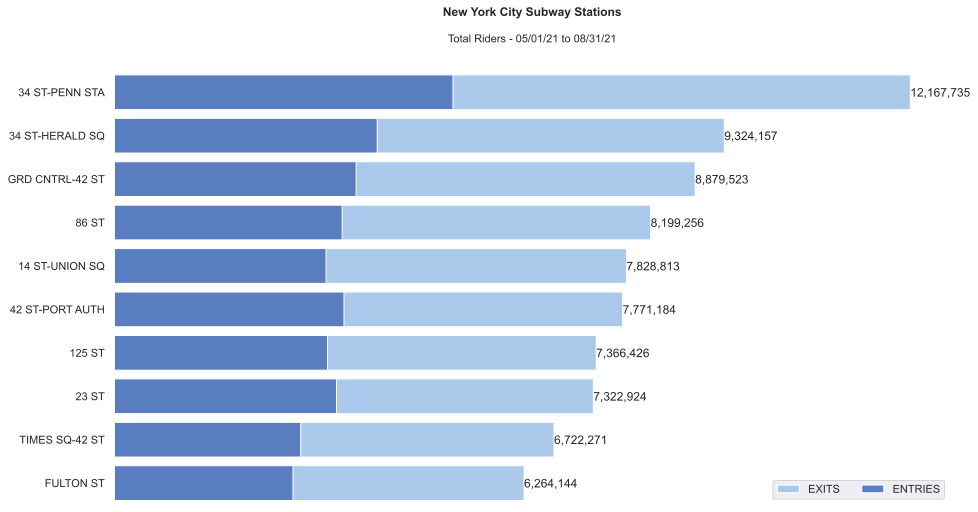

In [1567]:
f, ax = plt.subplots(figsize = (15,8))

sns.set_color_codes('pastel')
sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stations_totals.head(10),
            label = 'EXITS', color = 'b', edgecolor = 'w')
initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1
    
sns.set_color_codes('muted')
sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stations_totals.head(10),
            label = 'ENTRIES', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xticks([]) 
ax.set(ylabel='', xlabel='')
#ax.set_xlabel('Total Riders', loc='right')
ax.set_facecolor("white")
plt.text(x=0.5, y=1.12, s='New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.text(x=0.5, y=1.06, s= "Total Riders - 05/01/21 to 08/31/21", fontsize=11, ha="center", va='bottom',transform=ax.transAxes)

plt.savefig('./pics/NYC_totalRiders.png')

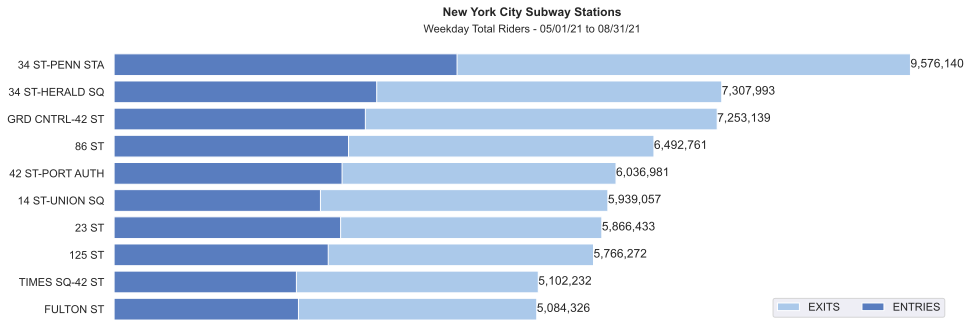

In [1545]:
f, ax = plt.subplots(figsize = (15,5))

sns.set_color_codes('pastel')
sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stations_weekday_totals.head(10),
            label = 'EXITS', color = 'b', edgecolor = 'w')
initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1
    
sns.set_color_codes('muted')
sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stations_weekday_totals.head(10),
            label = 'ENTRIES', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xticks([]) 
ax.set(ylabel='', xlabel='')
#ax.set_xlabel('Total Riders', loc='right')
ax.set_facecolor("white")
plt.text(x=0.5, y=1.12, s='New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.text(x=0.5, y=1.06, s= "Weekday Total Riders - 05/01/21 to 08/31/21", fontsize=11, ha="center", va='bottom',transform=ax.transAxes)

plt.savefig('./pics/NYC_weekdayRiders.png')

In [1546]:
# f, ax = plt.subplots(figsize = (10,5))

# sns.set_color_codes('pastel')
# sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stationlines_weekday_totals.head(10),
#             label = 'EXITS', color = 'b', edgecolor = 'w')
# initialx=0
# for p in ax.patches:
#     ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
#     initialx+=1
    
# sns.set_color_codes('muted')
# sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stationlines_weekday_totals.head(10),
#             label = 'ENTRIES', color = 'b', edgecolor = 'w')
# ax.legend(ncol = 2, loc = 'lower right')
# ax.set_xticks([]) 
# ax.set(ylabel='', xlabel='')
# #ax.set_xlabel('Total Riders', loc='right')
# ax.set_facecolor("white")
# plt.text(x=0.5, y=1.12, s='New York City Subway Stationlines', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
# plt.text(x=0.5, y=1.06, s= "Weekday Total Riders - 05/01/21 to 08/31/21", fontsize=11, ha="center", va='bottom',transform=ax.transAxes)

# plt.savefig('./pics/NYC_weekdayRiders.png')

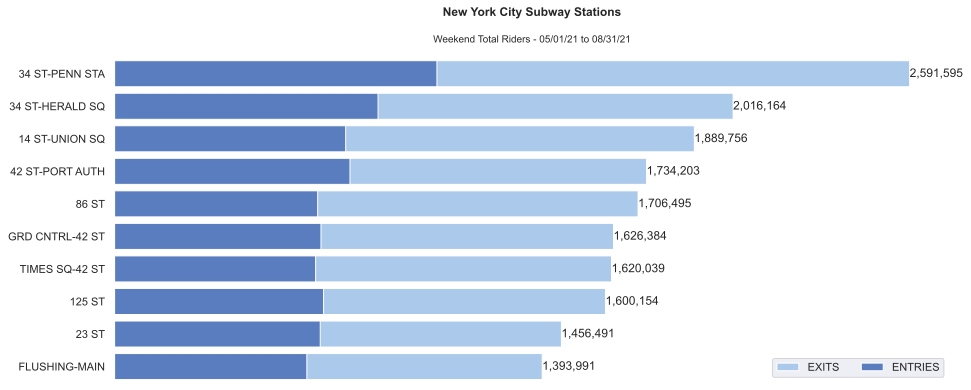

In [1547]:
f, ax = plt.subplots(figsize = (15,6))

sns.set_color_codes('pastel')
sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stations_weekend_totals.head(10),
            label = 'EXITS', color = 'b', edgecolor = 'w')

initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1
    
sns.set_color_codes('muted')
sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stations_weekend_totals.head(10),
            label = 'ENTRIES', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')

ax.set(ylabel='', xlabel='')
#ax.set_xlabel('Total Riders', loc='right')
ax.set_facecolor("white")
ax.set_xticks([]) 

plt.text(x=0.5, y=1.12, s='New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.text(x=0.5, y=1.04, s= "Weekend Total Riders - 05/01/21 to 08/31/21", fontsize=10, ha="center", va='bottom',transform=ax.transAxes)

plt.savefig('./pics/NYC_weekendRiders.png')

In [1427]:
# f, ax = plt.subplots(figsize = (10,6))

# sns.set_color_codes('pastel')
# sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stationlines_weekend_totals.head(10),
#             label = 'EXITS', color = 'b', edgecolor = 'w')

# initialx=0
# for p in ax.patches:
#     ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
#     initialx+=1
    
# sns.set_color_codes('muted')
# sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stationlines_weekend_totals.head(10),
#             label = 'ENTRIES', color = 'b', edgecolor = 'w')
# ax.legend(ncol = 2, loc = 'lower right')

# ax.set(ylabel='', xlabel='')
# #ax.set_xlabel('Total Riders', loc='right')
# ax.set_facecolor("white")
# ax.set_xticks([]) 

# plt.text(x=0.5, y=1.12, s='New York City Subway Stationlines', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
# plt.text(x=0.5, y=1.04, s= "Weekend Total Riders - 05/01/21 to 08/31/21", fontsize=10, ha="center", va='bottom',transform=ax.transAxes)

# plt.savefig('./pics/NYC_weekendRiders.png')

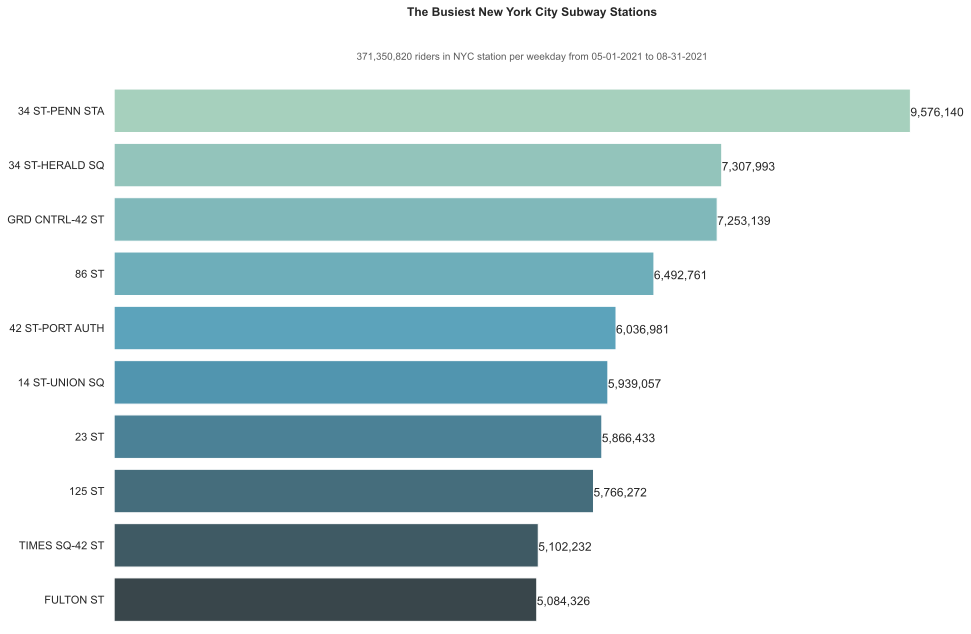

In [1521]:

#weekday
sns.set(rc={"figure.figsize":(15,10)})
ax = sns.barplot(y="STATION",x="TOTAL_RIDERS", data=stations_weekday_totals.head(10),palette="GnBu_d")

ax.text(x=0.5, y=1.12, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.04, s='{:,.0f} riders in NYC station per weekday from 05-01-2021 to 08-31-2021'.format(int(stations_weekday_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1
ax.set(ylabel='', xlabel='')
ax.set_facecolor('white')
ax.set_xticks([]) 

plt.savefig('./pics/NYC_weekdayRiders_mix.png')



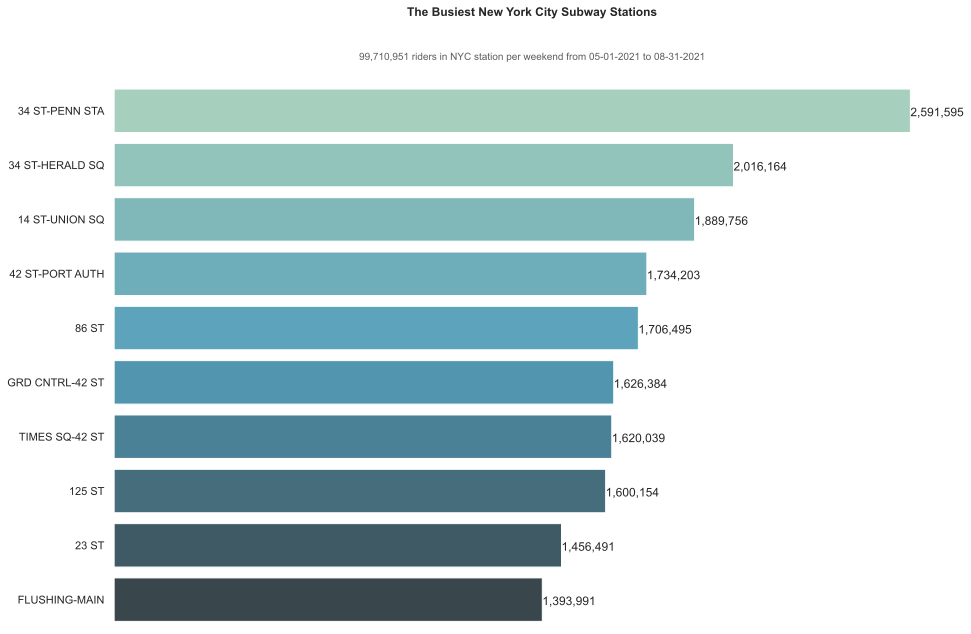

In [1522]:

#weekend
sns.set(rc={"figure.figsize":(15,10)})
ax = sns.barplot(y="STATION",x="TOTAL_RIDERS", data=stations_weekend_totals.head(10),palette="GnBu_d")

ax.text(x=0.5, y=1.12, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.04, s='{:,.0f} riders in NYC station per weekend from 05-01-2021 to 08-31-2021'.format(int(stations_weekend_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1
ax.set(ylabel='', xlabel='')
ax.set_facecolor('white')
ax.set_xticks([]) 

plt.savefig('./pics/NYC_weekendRiders_mix.png')




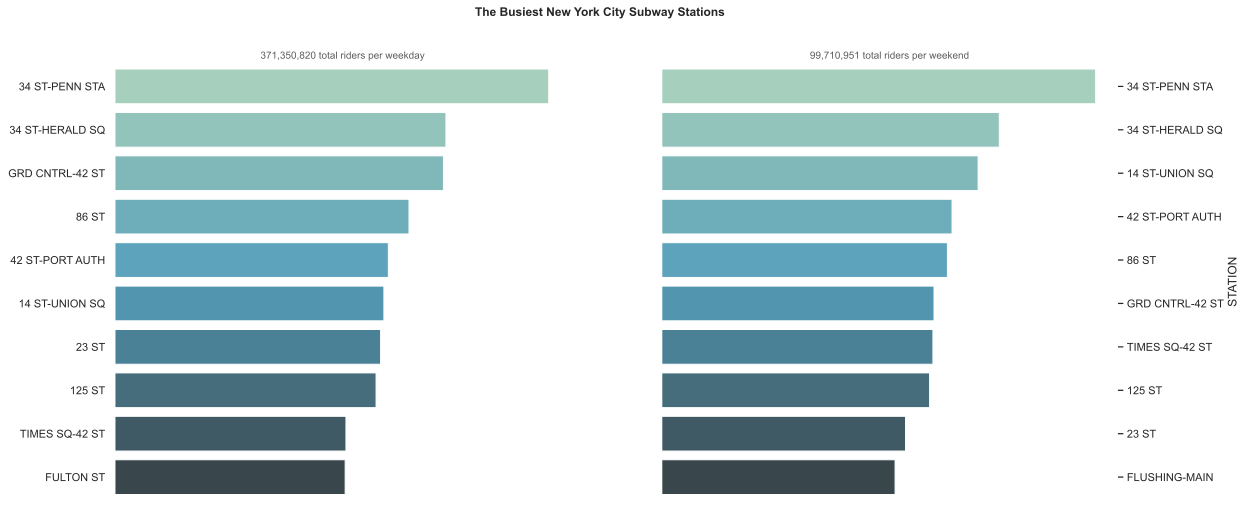

In [1523]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
fig.suptitle('The Busiest New York City Subway Stations', fontsize=12, weight='bold')

# WeekdayNone
fig = sns.barplot(ax=axes[0], x="TOTAL_RIDERS", y="STATION", data=stations_weekday_totals.sort_values('TOTAL_RIDERS', ascending=False).head(10), palette="GnBu_d")
axes[0].set_title('{:,.0f} total riders per weekday'.\
                  format(int(stations_weekday_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75)
axes[0].set(xlabel='WEEKDAY DAILY ENTRIES', ylabel='')
axes[0].set_facecolor('white')
axes[0].get_xaxis().set_visible(False)
axes[0].grid(False)
# Weekend
sns.barplot(ax=axes[1].twinx(), x="TOTAL_RIDERS", y="STATION", data=stations_weekend_totals.sort_values('TOTAL_RIDERS', ascending=False).head(10),palette="GnBu_d")
axes[1].set(xlabel='WEEKEND DAILY ENTRIES',ylabel='')

axes[1].set_title('{:,.0f} total riders per weekend'.\
                  format(int(stations_weekend_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75)
    
axes[1].get_xaxis().set_visible(False)
axes[1].grid(False)
axes[1].yaxis.set_ticks_position('none') 

axes[1].set_facecolor('white')


plt.savefig('./pics/Busiest_NYC_Subway.png')

### 3. analysis result visulization

Plot the daily time series for a station.

In [1549]:
station_daily['TOTAL_RIDERS'] = station_daily['DAILY_ENTRIES'] + station_daily['DAILY_EXITS']

In [1550]:
#station_daily

In [1551]:
station_daily_34_st_penn = station_daily[station_daily['STATION'] == '34 ST-PENN STA'].copy()
station_daily_34_st_heard = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ'].copy()
station_daily_GRD_CTR_42 = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST'].copy()
station_daily_86_ST = station_daily[station_daily['STATION'] == '86 ST'].copy()
station_daily_42_ST = station_daily[station_daily['STATION'] == '42 ST-PORT AUTH'].copy()
station_daily_14_ST_UNIONSQ = station_daily[station_daily['STATION'] == '14 ST-UNION SQ'].copy()
station_daily_125_ST = station_daily[station_daily['STATION'] == '125 ST'].copy()
station_daily_34_st_penn.head()

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
11098,34 ST-PENN STA,123,05/02/2021,3882.0,6147.0,10029.0
11099,34 ST-PENN STA,123,05/03/2021,6755.0,8790.0,15545.0
11100,34 ST-PENN STA,123,05/04/2021,6907.0,9170.0,16077.0
11101,34 ST-PENN STA,123,05/05/2021,6719.0,9101.0,15820.0
11102,34 ST-PENN STA,123,05/06/2021,7045.0,9371.0,16416.0


In [1552]:
def get_topN_data(busiest_stations):
    dfs = []
    for station in busiest_stations:
        dfs.append(station_daily[station_daily['STATION'] == station].copy())
    return pd.concat(dfs)


stations_daily_totals
top10_stations_daily_df = get_topN_data(list(set(stations_weekday_totals.STATION[:10].append(stations_weekend_totals.STATION[:10]))))
top10_stations_weekday_df = get_topN_data(list(set(stations_weekday_totals.STATION[:10])))
top10_stations_weekend_df = get_topN_data(list(set(stations_weekday_totals.STATION[:10])))

top10_stations_daily_df.DATE = pd.to_datetime(top10_stations_daily_df.DATE)
top10_stations_weekday_df.DATE = pd.to_datetime(top10_stations_weekday_df.DATE)
top10_stations_weekend_df.DATE = pd.to_datetime(top10_stations_weekend_df.DATE)

In [1553]:
top10_stations_daily_df

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
38052,GRD CNTRL-42 ST,4567S,2021-05-02,11499.0,16981.0,28480.0
38053,GRD CNTRL-42 ST,4567S,2021-05-03,26904.0,36133.0,63037.0
38054,GRD CNTRL-42 ST,4567S,2021-05-04,29186.0,38576.0,67762.0
38055,GRD CNTRL-42 ST,4567S,2021-05-05,30084.0,39704.0,69788.0
38056,GRD CNTRL-42 ST,4567S,2021-05-06,29995.0,40405.0,70400.0
...,...,...,...,...,...,...
12557,42 ST-PORT AUTH,ACENQRS1237W,2021-08-27,29249.0,37807.0,67056.0
12558,42 ST-PORT AUTH,ACENQRS1237W,2021-08-28,20926.0,25131.0,46057.0
12559,42 ST-PORT AUTH,ACENQRS1237W,2021-08-29,16667.0,21478.0,38145.0
12560,42 ST-PORT AUTH,ACENQRS1237W,2021-08-30,26718.0,33539.0,60257.0


In [1554]:
#top10_stations_daily_df[(top10_stations_daily_df['STATION']=='34 ST-PENN STA')]

In [1555]:
top10_stations_daily_df.groupby(['STATION','LINENAME'])[['DAILY_ENTRIES', 'DAILY_EXITS', 'TOTAL_RIDERS']].sum()

DAILY_ENTRIES  DAILY_EXITS  TOTAL_RIDERS
STATION         LINENAME                                              
125 ST          1                  316254.0     456275.0      772529.0
                23                 602860.0     482034.0     1084894.0
                456               1136738.0    1591478.0     2728216.0
                ACBD              1203113.0    1577674.0     2780787.0
14 ST-UNION SQ  456LNQRW          1073737.0    1694708.0     2768445.0
                LNQR456W          2163565.0    2896803.0     5060368.0
23 ST           1                  466425.0     600482.0     1066907.0
                6                  717785.0     907523.0     1625308.0
                CE                 750234.0     759622.0     1509856.0
                FM                 837096.0    1135001.0     1972097.0
                NRW                625259.0     523497.0     1148756.0
34 ST-HERALD SQ BDFMNQRW          4019117.0    5305040.0     9324157.0
34 ST-PENN STA  123                860901.0    1354327.0     2215228.0
                123ACE            1599170.0    1949674.0     3548844.0
                ACE               2717012.0    3686651.0     6403663.0
42 ST-PORT AUTH ACENGRS1237W       367245.0     525395.0      892640.0
                ACENQRS1237W      3143920.0    3734624.0     6878544.0
86 ST           1                  705026.0    1001818.0     1706844.0
                456               1725148.0    2441399.0     4166547.0
                BC                 396212.0     506218.0      902430.0
                N                  136542.0     160808.0      297350.0
                R                  520590.0     605495.0     1126085.0
FLUSHING-MAIN   7                 2804948.0    3216138.0     6021086.0
FULTON ST       2345ACJZ          1729373.0    2389913.0     4119286.0
                ACJZ2345           762709.0     798203.0     1560912.0
                G                  239365.0     344581.0      583946.0
GRD CNTRL-42 ST 4567S             3696735.0    5182788.0     8879523.0
TIMES SQ-42 ST  1237ACENQRS        890133.0     553661.0     1443794.0
                1237ACENQRSW      1514541.0    2422816.0     3937357.0
                ACENQRS1237W       445768.0     895352.0     1341120.0

In [1556]:
top10_stations_daily_df

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
38052,GRD CNTRL-42 ST,4567S,2021-05-02,11499.0,16981.0,28480.0
38053,GRD CNTRL-42 ST,4567S,2021-05-03,26904.0,36133.0,63037.0
38054,GRD CNTRL-42 ST,4567S,2021-05-04,29186.0,38576.0,67762.0
38055,GRD CNTRL-42 ST,4567S,2021-05-05,30084.0,39704.0,69788.0
38056,GRD CNTRL-42 ST,4567S,2021-05-06,29995.0,40405.0,70400.0
...,...,...,...,...,...,...
12557,42 ST-PORT AUTH,ACENQRS1237W,2021-08-27,29249.0,37807.0,67056.0
12558,42 ST-PORT AUTH,ACENQRS1237W,2021-08-28,20926.0,25131.0,46057.0
12559,42 ST-PORT AUTH,ACENQRS1237W,2021-08-29,16667.0,21478.0,38145.0
12560,42 ST-PORT AUTH,ACENQRS1237W,2021-08-30,26718.0,33539.0,60257.0


In [1557]:
data1 = top10_stations_daily_df.groupby(['STATION','DATE'])[['DAILY_ENTRIES', 'DAILY_EXITS', 'TOTAL_RIDERS']].sum()\
        .reset_index().sort_values(['STATION','DATE'])

In [1558]:
data1

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
0,125 ST,2021-05-02,16588.0,22911.0,39499.0
1,125 ST,2021-05-03,27192.0,33522.0,60714.0
2,125 ST,2021-05-04,29163.0,34936.0,64099.0
3,125 ST,2021-05-05,27838.0,32726.0,60564.0
4,125 ST,2021-05-06,30022.0,35491.0,65513.0
...,...,...,...,...,...
1337,TIMES SQ-42 ST,2021-08-27,17393.0,18479.0,35872.0
1338,TIMES SQ-42 ST,2021-08-28,28962.0,48537.0,77499.0
1339,TIMES SQ-42 ST,2021-08-29,19066.0,28077.0,47143.0
1340,TIMES SQ-42 ST,2021-08-30,25751.0,36319.0,62070.0


In [1559]:
##### Q1 data1.groupby(['STATION','DATE']).DATE.nunique()


In [1663]:
#sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

import plotly.express as px
import plotly.io as io

# Without transparency
fig = px.line(data_frame=data1, x=data1.DATE , y= data1.TOTAL_RIDERS , color="STATION" )
fig.update_yaxes(range=[0, 600000])

plotly.io.write_html(fig,'./mta_data/topStationsTrend.htm')

Make a list of counts for one week for one station: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available.

plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

#### Problem 9

Make a list of counts for **one week** for **one station**: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available. 

`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

*Hint: [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) and [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.isocalendar.html) may prove useful.*


In [1561]:
top10_stations_daily_df['DAY_OF_WEEK_NUM'] = pd.to_datetime(top10_stations_daily_df['DATE']).dt.dayofweek
top10_stations_daily_df['WEEK_OF_YEAR'] = pd.to_datetime(top10_stations_daily_df['DATE']).dt.isocalendar().week

In [1562]:
week_data

,STATION,DAY_OF_WEEK_NUM,TOTAL_RIDERS,WEEK_OF_YEAR
,,,sum,first
0,34 ST-PENN STA,0,2151139.0,18
1,34 ST-PENN STA,1,2295130.0,18
2,34 ST-PENN STA,2,1870655.0,18
3,34 ST-PENN STA,3,1916681.0,18
4,34 ST-PENN STA,4,1953612.0,18
5,34 ST-PENN STA,5,1378772.0,18
6,34 ST-PENN STA,6,1212823.0,17


In [1568]:
stations_totals

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,5177083.0,6990652.0,12167735.0
59,34 ST-HERALD SQ,4019117.0,5305040.0,9324157.0
233,GRD CNTRL-42 ST,3696735.0,5182788.0,8879523.0
110,86 ST,3483518.0,4715738.0,8199256.0
14,14 ST-UNION SQ,3237302.0,4591511.0,7828813.0
...,...,...,...,...
148,BEACH 98 ST,22494.0,35495.0,57989.0
141,BEACH 105 ST,15288.0,25603.0,40891.0
354,TOMPKINSVILLE,34103.0,2.0,34105.0
162,BROAD CHANNEL,13768.0,8481.0,22249.0


In [1575]:
week_data.columns = [column[0] for column in week_data.columns]

In [1602]:

top10


['GRD CNTRL-42 ST',
 '125 ST',
 '86 ST',
 'PATH NEW WTC',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH']

In [ ]:
top5_stations_daily_df = get_topN_data(list(set(stations_weekday_totals.STATION[:5].append(stations_weekend_totals.STATION[:5]))))
top5_stations_daily_df['DAY_OF_WEEK_NUM'] = pd.to_datetime(top5_stations_daily_df['DATE']).dt.dayofweek
top5_stations_daily_df['WEEK_OF_YEAR'] = pd.to_datetime(top5_stations_daily_df['DATE']).dt.isocalendar().week


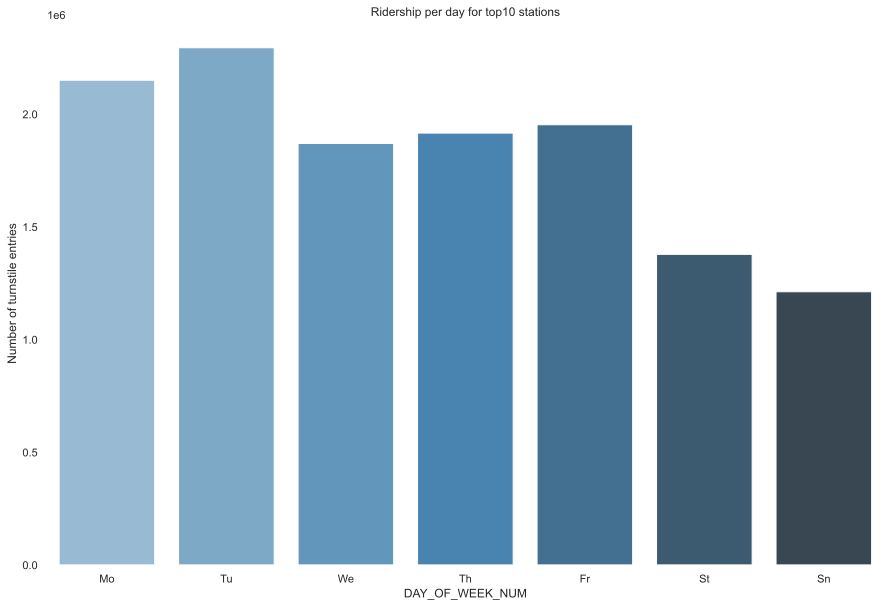

In [1631]:


# plt.bar(data['DAY_OF_WEEK_NUM'], data['TOTAL_RIDERS'])
    
# plt.xlabel('Day of the week')
# plt.ylabel('Number of turnstile entries')
# plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
# plt.title('Ridership per day for top10 stations');


# read a titanic.csv file
# from seaborn library
df = week_data.groupby(['DAY_OF_WEEK_NUM'],as_index=False )['TOTAL_RIDERS'].sum()
 
# who v/s fare barplot
sns.barplot(x = 'DAY_OF_WEEK_NUM',
            y = 'TOTAL_RIDERS',
            data = df,  palette="Blues_d", capsize=.2)
sns.set(rc={'axes.facecolor':'White'})
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for top10 stations');
# Show the plot
#plt.show()

plt.savefig('./pics/week_traffic_plot.png')

In [1642]:
top5_stations_daily_df

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
38052,GRD CNTRL-42 ST,4567S,05/02/2021,11499.0,16981.0,28480.0
38053,GRD CNTRL-42 ST,4567S,05/03/2021,26904.0,36133.0,63037.0
38054,GRD CNTRL-42 ST,4567S,05/04/2021,29186.0,38576.0,67762.0
38055,GRD CNTRL-42 ST,4567S,05/05/2021,30084.0,39704.0,69788.0
38056,GRD CNTRL-42 ST,4567S,05/06/2021,29995.0,40405.0,70400.0
...,...,...,...,...,...,...
12557,42 ST-PORT AUTH,ACENQRS1237W,08/27/2021,29249.0,37807.0,67056.0
12558,42 ST-PORT AUTH,ACENQRS1237W,08/28/2021,20926.0,25131.0,46057.0
12559,42 ST-PORT AUTH,ACENQRS1237W,08/29/2021,16667.0,21478.0,38145.0
12560,42 ST-PORT AUTH,ACENQRS1237W,08/30/2021,26718.0,33539.0,60257.0


In [1641]:
top5_stations_daily_df
top10_stations_daily_df

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
38052,GRD CNTRL-42 ST,4567S,2021-05-02,11499.0,16981.0,28480.0,6,17
38053,GRD CNTRL-42 ST,4567S,2021-05-03,26904.0,36133.0,63037.0,0,18
38054,GRD CNTRL-42 ST,4567S,2021-05-04,29186.0,38576.0,67762.0,1,18
38055,GRD CNTRL-42 ST,4567S,2021-05-05,30084.0,39704.0,69788.0,2,18
38056,GRD CNTRL-42 ST,4567S,2021-05-06,29995.0,40405.0,70400.0,3,18
...,...,...,...,...,...,...,...,...
12557,42 ST-PORT AUTH,ACENQRS1237W,2021-08-27,29249.0,37807.0,67056.0,4,34
12558,42 ST-PORT AUTH,ACENQRS1237W,2021-08-28,20926.0,25131.0,46057.0,5,34
12559,42 ST-PORT AUTH,ACENQRS1237W,2021-08-29,16667.0,21478.0,38145.0,6,34
12560,42 ST-PORT AUTH,ACENQRS1237W,2021-08-30,26718.0,33539.0,60257.0,0,35


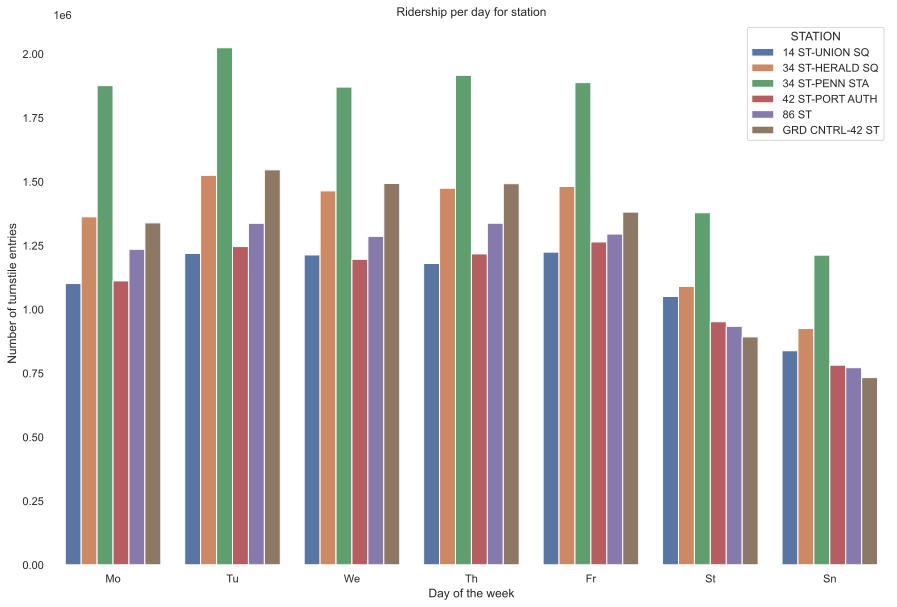

In [1646]:

df = top5_stations_daily_df.groupby(['STATION', 'DAY_OF_WEEK_NUM'],as_index=False)['TOTAL_RIDERS'].sum()

legend=['GRD CNTRL-42 ST','125 ST','86 ST','PATH NEW WTC','34 ST-HERALD SQ','34 ST-PENN STA','23 ST','TIMES SQ-42 ST','14 ST-UNION SQ','42 ST-PORT AUTH']
sns.barplot(x = 'DAY_OF_WEEK_NUM', y = 'TOTAL_RIDERS',hue = 'STATION',data = df)
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])

plt.title('Ridership per day for station');
plt.savefig('./pics/week_stations_plot.png') 

In [1599]:
top10_stations_daily_df

,STATION,LINENAME,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
38052,GRD CNTRL-42 ST,4567S,2021-05-02,11499.0,16981.0,28480.0,6,17
38053,GRD CNTRL-42 ST,4567S,2021-05-03,26904.0,36133.0,63037.0,0,18
38054,GRD CNTRL-42 ST,4567S,2021-05-04,29186.0,38576.0,67762.0,1,18
38055,GRD CNTRL-42 ST,4567S,2021-05-05,30084.0,39704.0,69788.0,2,18
38056,GRD CNTRL-42 ST,4567S,2021-05-06,29995.0,40405.0,70400.0,3,18
...,...,...,...,...,...,...,...,...
12557,42 ST-PORT AUTH,ACENQRS1237W,2021-08-27,29249.0,37807.0,67056.0,4,34
12558,42 ST-PORT AUTH,ACENQRS1237W,2021-08-28,20926.0,25131.0,46057.0,5,34
12559,42 ST-PORT AUTH,ACENQRS1237W,2021-08-29,16667.0,21478.0,38145.0,6,34
12560,42 ST-PORT AUTH,ACENQRS1237W,2021-08-30,26718.0,33539.0,60257.0,0,35


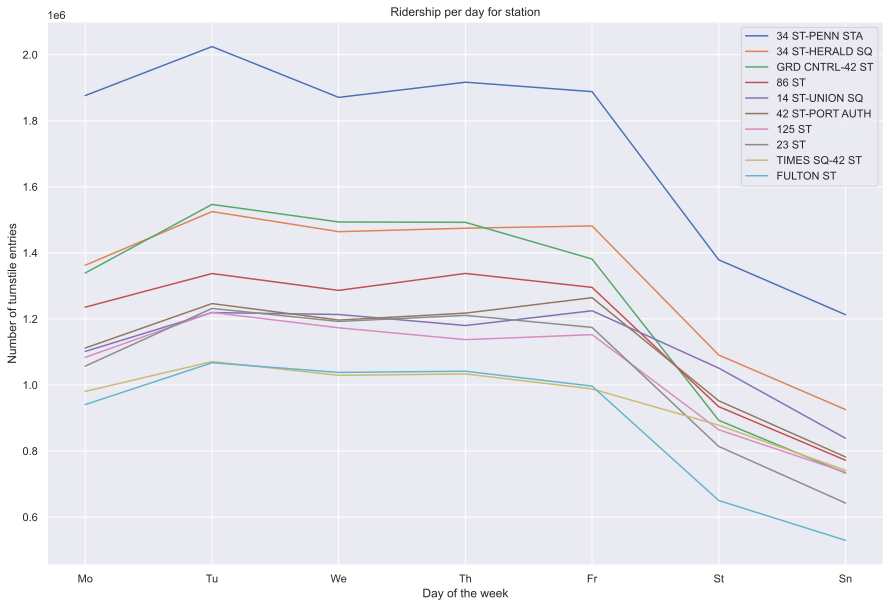

In [1564]:
def week_plot(topN):
    legend=[]
    for i in range(topN):
        station = stations_totals.iloc[i:i+1].STATION.astype(str).iloc[0]
        legend.append(station)
        week_data = top10_stations_daily_df.loc[(top10_stations_daily_df.STATION==station)]
        week_data= (week_data.groupby(['STATION','DAY_OF_WEEK_NUM'], as_index=False)\
                .agg({'TOTAL_RIDERS':['sum'], 'WEEK_OF_YEAR':['first']}))
       # plt.bars(week_data['DAY_OF_WEEK_NUM'], week_data['TOTAL_RIDERS'])
        plt.plot(week_data['DAY_OF_WEEK_NUM'], week_data['TOTAL_RIDERS'])
        plt.xlabel('Day of the week')
        plt.ylabel('Number of turnstile entries')
        plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
        plt.legend(legend)

        plt.title('Ridership per day for station');
        plt.savefig('./pics/week_plot.png')
        #print(week_data.head(5))


week_plot(10)


### NYC map -- Ingnore the following parts (I used tableau instread)

In [1647]:
import json
import math
from area import area
from sklearn import neighbors 

In [1648]:
nycmap = json.load(open("./mta_data/nycpluto_manhattan.geojson"))
nycmap

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.968461, 40.757225],
       [-73.968618, 40.757004],
       [-73.968685, 40.757033],
       [-73.968529, 40.757254],
       [-73.968461, 40.757225]]]]},
   'properties': {'bbl': 1013260039}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.954136, 40.776749],
       [-73.954322, 40.776493],
       [-73.9544, 40.776526],
       [-73.954214, 40.776781],
       [-73.954136, 40.776749]]]]},
   'properties': {'bbl': 1015290011}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.995013, 40.712615],
       [-73.995105, 40.712607],
       [-73.995148, 40.712888],
       [-73.995051, 40.712896],
       [-73.995013, 40.712615]]]]},
   'properties': {'bbl': 1002770029}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.975835, 40.74511],
       [-73.

In [1654]:
# read in location of schools and offices and career training public facilities in NYC
libs = pd.read_csv('./mta_data/manhattanlibraries.csv', usecols=['facname', 'latitude', 'longitude'])
libs['latitude'] = libs['latitude'].apply(func=math.radians)
libs['longitude'] = libs['longitude'].apply(func=math.radians)
libs['coord']= list(zip(libs['latitude'] ,libs['longitude']))
libs.head(5)

libcoords = np.asarray(list(libs['coord']))
tree = neighbors.BallTree(libcoords, metric="haversine")
tree

,facname,latitude,longitude,coord
0,HUDSON PARK LIBRARY,0.710871,-1.291636,"(0.7108712567291323, -1.2916362089577733)"
1,67TH STREET LIBRARY,0.711482,-1.290838,"(0.711481925792003, -1.2908376526085563)"
2,125TH STREET LIBRARY,0.712147,-1.290407,"(0.7121470164219, -1.2904065923610688)"
3,53RD STREET LIBRARY,0.711410,-1.291149,"(0.7114102879199523, -1.2911485562930298)"
4,58TH STREET LIBRARY,0.711438,-1.291008,"(0.7114379379588899, -1.2910079316949048)"


In [1664]:

# load lot data from csv file, convert coordinates to radians, and create coordinate pairs
df = pd.read_csv('./mta_data/pluto_small.csv')
df = df.dropna(subset=['assesstot', 'bldgarea', 'lotarea', 'latitude', 'longitude'])
df['latitude'] = df['latitude'].apply(func=math.radians)
df['longitude'] = df['longitude'].apply(func=math.radians)
df['coord'] = list(zip(df['latitude'], df['longitude']))

# query the BallTree and save results back in df
lotcoords = np.asarray(list(df['coord']))
dist, _ = tree.query(X=lotcoords, k=1)
df['dist'] = dist
df['dist'] = df['dist'].apply(lambda x: x*3960)

# use Plotly express function to create a choropleth map
fig = px.choropleth_mapbox(df,
                           geojson=nycmap,
                           locations="bbl",
                           featureidkey="properties.bbl",
                           color="dist",
                           color_continuous_scale=px.colors.sequential.thermal[::-1],
                           range_color=(0, 0.5),
                           mapbox_style="carto-positron",
                           zoom=9, center={"lat": 40.7, "lon": -73.7},
                           opacity=0.7,
                           hover_name="ownername"
                           )

plotly.io.write_html(fig,'./mta_data/nyc_libraries.htm')

In [1678]:
# read the neighborhood population data into a DataFrame and load the GeoJSON data
df = pd.read_csv('./mta_data/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
nycmap = json.load(open("./mta_data/nyc_neighborhoods.geojson"))

# create dictionary of nta codes mapping to area (square miles)
d = {}
neighborhood = nycmap["features"]
for n in neighborhood:
    code = n["properties"]["ntacode"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# create new columns in df for area and density
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df["density"] = df["Population"]/df["area"]

# call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=nycmap,
                           locations="NTA Code",
                           featureidkey="properties.ntacode",
                           color="density",
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=9, center={"lat": 40.7, "lon": -73.9},
                           opacity=0.7,
                           hover_name="NTA Name"
                           )

plotly.io.write_html(fig,'./mta_data/nyc_neighborhoods.htm')

### Question

-- Why the process extract doesnt not work if put inside the for loop

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
fuzz.token_set_ratio('GRD CNTRL-42 ST','Grand Central - 42nd Street')

In [1079]:
for i in range(10):
    query=top10[i]
    process.extract(query, choices, limit=2)

In [828]:
mta_loc_df2 = pd.read_csv(r'./mta_data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
print(mta_loc_df2)


     Division               Line        Station Name  Station Latitude  \
0         IRT    42nd St Shuttle       Grand Central         40.752769   
1         IRT    42nd St Shuttle       Grand Central         40.752769   
2         IRT    42nd St Shuttle       Grand Central         40.752769   
3         IRT    42nd St Shuttle       Grand Central         40.752769   
4         IRT    42nd St Shuttle       Grand Central         40.752769   
...       ...                ...                 ...               ...   
1863      IRT  White Plains Road          Simpson St         40.824073   
1864      IRT  White Plains Road          Simpson St         40.824073   
1865      IRT  White Plains Road  Wakefield-241st St         40.903125   
1866      IRT  White Plains Road  Wakefield-241st St         40.903125   
1867      IRT  White Plains Road  Wakefield-241st St         40.903125   

      Station Longitude Route1 Route2 Route3 Route4 Route5  ...    ADA  \
0            -73.979189     GS      4